<a href="https://colab.research.google.com/github/Crisvela67/Modelo-Predictivo-/blob/main/BIY7121_002D_ET_Grupo8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ASIGNATURA: Minería De Datos
### NOMBRE PROYECTO: Clima Australia
### FECHA: 06/03/2023
### NOMBRE INTEGRANTES:
- Cristopher Velasquez

- Fabian Salinas

- Francis Gonzalez

# Carga de datos

In [ ]:
#@title Instalaciones
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.4 MB/s eta 0:00:00


In [ ]:
#@title Importaciones
#Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
import plotly.graph_objects as go
#MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
#Modelos
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.cluster import KMeans
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Medidas
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import roc_auc_score

#Equilibrio de data
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.datasets import make_classification


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning

In [ ]:
#@title ### Cargar Dataset
!wget -O weatherAUS.csv https://www.dropbox.com/s/5ye8qsavlk5gp2d/weatherAUS.csv
data=pd.read_csv('weatherAUS.csv',sep=",")

--2023-07-05 22:54:02--  https://www.dropbox.com/s/5ye8qsavlk5gp2d/weatherAUS.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/5ye8qsavlk5gp2d/weatherAUS.csv [following]
--2023-07-05 22:54:03--  https://www.dropbox.com/s/raw/5ye8qsavlk5gp2d/weatherAUS.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb6a4f2e50a3ea132bd2b6215a7.dl.dropboxusercontent.com/cd/0/inline/B_T2ucz0RTwdcVv8fuVd9WVfPsMLGQmnD5hZVjvfcrQzhgSQgOHweCXul9Gc5UcaUqiQmooPGpq8lkHohlwBchHY40024D_YHx69IJhcGGQtPhgNZ76mws1ySDrhAnfKuYSKkzKwGsOYYb4Be6f2enTjHWbynDmO0sCQ_UNPUGU6Ug/file# [following]
--2023-07-05 22:54:03--  https://ucb6a4f2e50a3ea132bd2b6215a7.dl.dropboxusercontent.com/cd/0/inline/B_T2ucz0RTwdcVv8fuVd9WVfPsMLGQmnD5hZVjvfcrQzhgSQgOHweCXul9Gc5UcaUqiQmoo

# FASE 1: Comprensión del Negocio

Se dispone de un set de datos de observaciones meteorológicas diarias de múltiples ubicaciones en Australia,
obtenidas de la Oficina de Meteorología de la Commonwealth de Australia y procesadas para crear este
conjunto de datos de muestra. El rango de tiempo de la data es desde 2007-11-01 hasta 2017-06-25. Las ubicaciones de donde se recopilaron los datos son de sureste y suroeste de australia puesto que en este sector presenta un clima templado con cuatro estaciones, específicamente las ubicaciones son:
Nhil, PerthAirport, Portland, Townsville, MelbourneAirport,
 Richmond, AliceSprings, Launceston, WaggaWagga, Mildura, SydneyAirport, Walpole, Albany, SalmonGums, Williamtown, Perth, GoldCoast, MountGambier, Adelaide, Nuriootpa, MountGinini, Albury, Newcastle, Sale, Watsonia, Brisbane, PearceRAAF, Melbourne, Moree, Witchcliffe, Hobart, Bendigo, Tuggeranong, Cairns, Sydney, BadgerysCreek, Canberra, Darwin, CoffsHarbour, NorfolkIsland, Uluru, Ballarat, Dartmoor, Penrith, Cobar, Wollongong, Woomera, Katherine, NorahHead

# FASE 2: Comprensión de los datos

### Descripción de la Data
* Date: Fecha de la observación
* Location: Ubicación de la estación meteorológica
* MinTemp: Temperatura mínima en grados Celsius
* MaxTemp: Temperatura máxima en grados Celsius
* RainFall: Cantidad de lluvia registrada ese día en mm
* Evaporation: Evaporación (mm) en 24 horas
* Sunshine: Número de horas de sol brillante en el día
* WindGustDir: Dirección de la ráfaga de viento más fuerte en 24 horas
* WindGustSpeed: Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas
* WindDir9am: Dirección del viento a las 9am
* WindDir3pm: Dirección del viento a las 3pm
* WindSpeed9am: Velocidad (km/hr) del viento a las 9am
* WindSpeed3am: Velocidad (km/hr) del viento a las 3pm
* Humidity9am: Porcentaje de humedad a las 9am
* Humidity3pm: Porcentaje de humedad a las 3pm
* Pressure9am: Presión atmosférica (hpa) a nivel del mar a las 9am
* Pressure3pm: Presión atmosférica (hpa) a nivel del mar a las 3pm
* Cloud9am: Fracción del cielo cubierto por nubes a las 9am. Se mide en "octavos", de manera que un valor 0indica cielo totalmente despejado y 8, cielo totalmente cubierto
* Cloud3pm: Fracción del cielo cubierto por nubes a las 3pm. Se mide en "octavos", de manera que un valor 0indica cielo totalmente despejado y 8, cielo totalmente cubierto
* Temp9am: Temperatura en grados celsius a las 9am
* Temp3pm: Temperatura en grados celsius a las 3pm
* RainToday: Variable indicadora que toma el valor 1 si la precipitación en mm. en las últimas 24 hrs. excede1 mm. y 0 si no
* Risk_MM: La cantidad de lluvia. Una especie de medida del "riesgo".
* RainTomorrow: Variable indicadora que toma el valor 1 si al día siguiente llovió y 0 si no.

In [ ]:
#@title Información general
#Info general y forma
display(HTML('<h3>Información General</h3> <hr>'))
display(data.info())
a=data.shape
forma = data.shape
print("-------------------------------------------")
print("Forma: Filas {}, Columnas {}".format(*forma))
#Comentario
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

None

-------------------------------------------
Forma: Filas 142193, Columnas 24


In [ ]:
#@title Cantidad de datos nulos por columna
display(data.isnull().sum().sort_values(ascending=False))

Sunshine         67816
Evaporation      60843
Cloud3pm         57094
Cloud9am         53657
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
RainToday         1406
Rainfall          1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
RISK_MM              0
Date                 0
Location             0
RainTomorrow         0
dtype: int64

In [ ]:
#@title Estadistica General
data.describe(include="all")

Date  Location        MinTemp        MaxTemp       Rainfall  \
count       142193    142193  141556.000000  141871.000000  140787.000000   
unique        3436        49            NaN            NaN            NaN   
top     2013-12-01  Canberra            NaN            NaN            NaN   
freq            49      3418            NaN            NaN            NaN   
mean           NaN       NaN      12.186400      23.226784       2.349974   
std            NaN       NaN       6.403283       7.117618       8.465173   
min            NaN       NaN      -8.500000      -4.800000       0.000000   
25%            NaN       NaN       7.600000      17.900000       0.000000   
50%            NaN       NaN      12.000000      22.600000       0.000000   
75%            NaN       NaN      16.800000      28.200000       0.800000   
max            NaN       NaN      33.900000      48.100000     371.000000   

         Evaporation      Sunshine WindGustDir  WindGustSpeed WindDir9am  ...  \
count   81350.000000  74377.000000      132863  132923.000000     132180  ...   
unique           NaN           NaN          16            NaN         16  ...   
top              NaN           NaN           W            NaN          N  ...   
freq             NaN           NaN        9780            NaN      11393  ...   
mean        5.469824      7.624853         NaN      39.984292        NaN  ...   
std         4.188537      3.781525         NaN      13.588801        NaN  ...   
min         0.000000      0.000000         NaN       6.000000        NaN  ...   
25%         2.600000      4.900000         NaN      31.000000        NaN  ...   
50%         4.800000      8.500000         NaN      39.000000        NaN  ...   
75%         7.400000     10.600000         NaN      48.000000        NaN  ...   
max       145.000000     14.500000         NaN     135.000000        NaN  ...   

          Humidity3pm    Pressure9am    Pressure3pm      Cloud9am  \
count   138583.000000  128179.000000  128212.000000  88536.000000   
unique            NaN            NaN            NaN           NaN   
top               NaN            NaN            NaN           NaN   
freq              NaN            NaN            NaN           NaN   
mean        51.482606    1017.653758    1015.258204      4.437189   
std         20.797772       7.105476       7.036677      2.887016   
min          0.000000     980.500000     977.100000      0.000000   
25%         37.000000    1012.900000    1010.400000      1.000000   
50%         52.000000    1017.600000    1015.200000      5.000000   
75%         66.000000    1022.400000    1020.000000      7.000000   
max        100.000000    1041.000000    1039.600000      9.000000   

            Cloud3pm        Temp9am        Temp3pm  RainToday        RISK_MM  \
count   85099.000000  141289.000000  139467.000000     140787  142193.000000   
unique           NaN            NaN            NaN          2            NaN   
top              NaN            NaN            NaN         No            NaN   
freq             NaN            NaN            NaN     109332            NaN   
mean        4.503167      16.987509      21.687235        NaN       2.360682   
std         2.720633       6.492838       6.937594        NaN       8.477969   
min         0.000000      -7.200000      -5.400000        NaN       0.000000   
25%         2.000000      12.300000      16.600000        NaN       0.000000   
50%         5.000000      16.700000      21.100000        NaN       0.000000   
75%         7.000000      21.600000      26.400000        NaN       0.800000   
max         9.000000      40.200000      46.700000        NaN     371.000000   

        RainTomorrow  
count         142193  
unique             2  
top               No  
freq          110316  
mean             NaN  
std              NaN  
min              NaN  
25%              NaN  
50%              NaN  
75%              NaN  
max              NaN  

[11 rows x 24 columns]

## Análisis Estadístico de las columnas

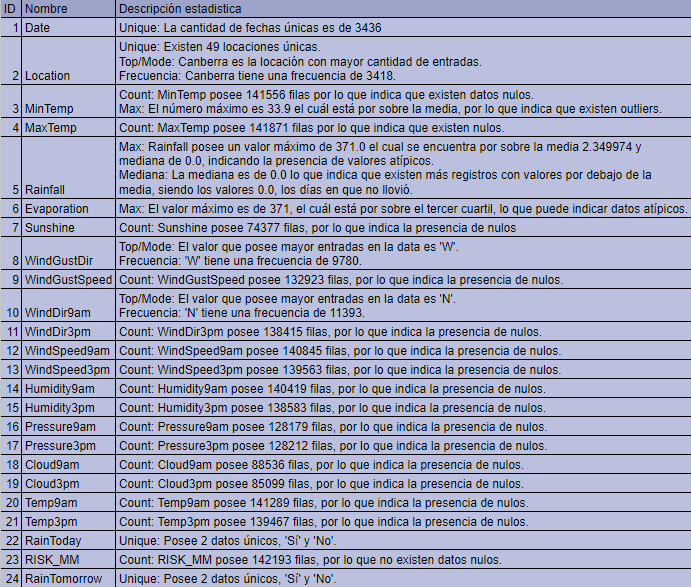

In [ ]:
#@title Frecuencias
col_Cualitativa = data.filter(["Location","WindGustDir","WindDir9am","WindDir3pm","RainToday","RainTomorrow"],axis=1)

for col in col_Cualitativa:
      Frecuencia=col_Cualitativa[col].value_counts()
      Frecuencia_r=col_Cualitativa[col].value_counts(normalize=True).round(3)
      Categoria=col_Cualitativa[col].value_counts().index
      Titulo=col
      fig = go.Figure(data=[go.Table(
              header=dict(values = [[col],
                                    ['<b>Frecuencia Absoluta</b>'],
                                    ['<b>Frecuencia Relativa</b>']],
                          fill_color='paleturquoise',
                          align='left'),
              cells=dict(values=[Categoria,Frecuencia,Frecuencia_r],
                        fill_color='lavender',
                        align='left'))
          ])
      if col_Cualitativa[col].nunique() >2:
        fig.update_layout(autosize=True)
        fig.update_layout(height=200, margin=dict(r=5, l=5, t=5, b=5))
      else:
        fig.update_layout(autosize=True)
        fig.update_layout(height=80, margin=dict(r=5, l=5, t=5, b=5))
      html_code ="""
                  <html>
                    <h3>Frecuencias %s</h3> <hr>
                  </html>""" % Titulo
      display(HTML(html_code))
      fig.show()

In [ ]:
#Comentario
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

> En el caso de las columnas con múltiples variables, se puede observar que existe una variable con mayor frecuencia, por lo que no es necesario utilizar multimoda.

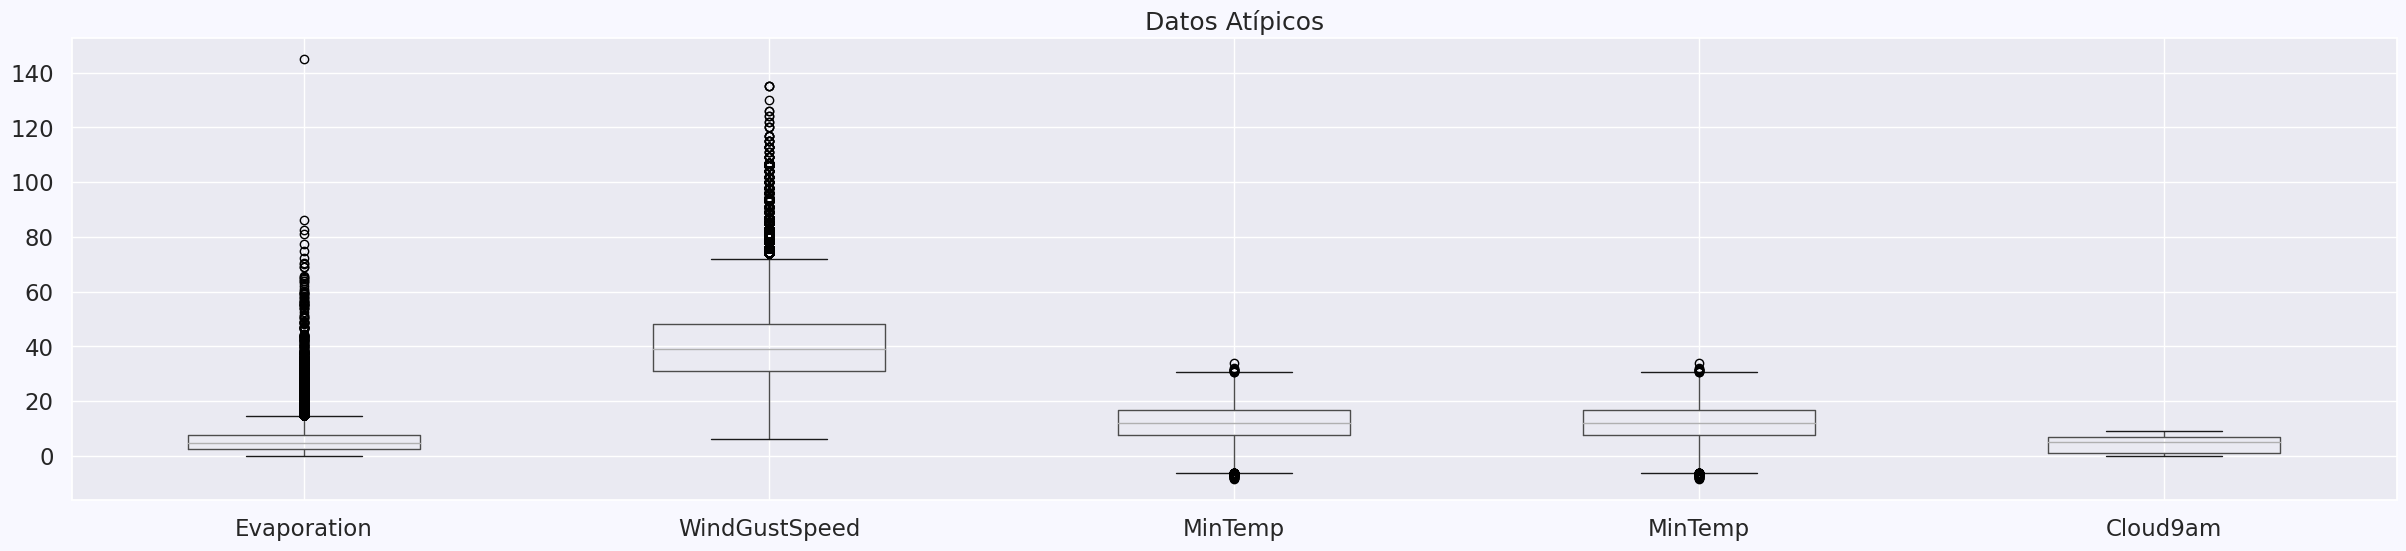

In [ ]:
#@title Visualización Datos Atípicos
display(HTML('<h3>Visualización datos atípicos</h3> <hr>'))
plt.figure(figsize=(30,6))
x=data.boxplot(['Evaporation','WindGustSpeed','MinTemp','MinTemp','Cloud9am'])
x.set_title('Datos Atípicos')
plt.show()
#Comentario
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

> Dentro de las variables cuantitativas que escogimos se puede observar que a pesar que las cuatro contienen datos atípicos, la columnas 'Evaporation' y 'WindGustSpeed' poseen mayor cantidad de datos atípicos.

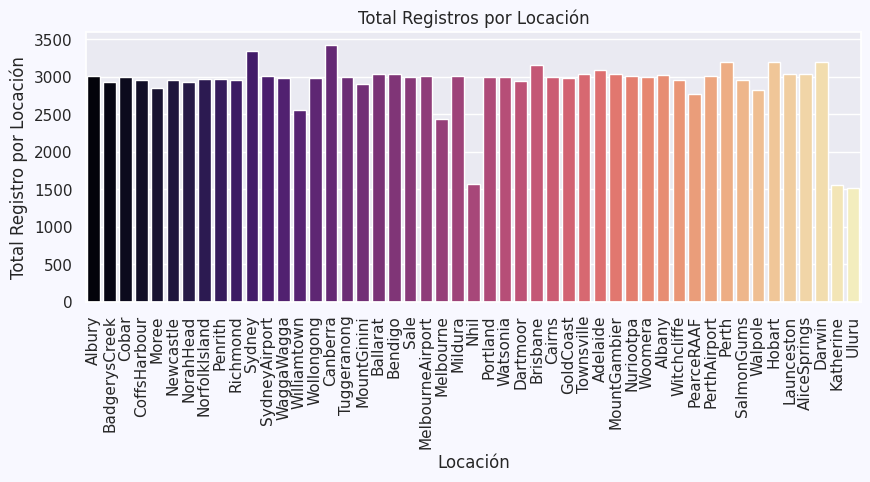

In [ ]:
#@title Total de Locaciones Registradas
display(HTML('<h3>Total de Registros por Región</h3> <hr>'))
plt.figure(figsize=(10,3.5))
sns.set_theme(style='darkgrid',font='sans-serif', font_scale=1,
              rc={'figure.facecolor': 'ghostwhite'})
graf=sns.countplot(x=data['Location'],palette='magma')
plt.xticks(rotation='vertical')
graf.set(xlabel="Locación", ylabel="Total Registro por Locación",title="Total Registros por Locación")
plt.show()

#Comentario
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

> Se puede observar que en general, el total de registros por locación es similiar, siendo Nhil, Katherine y Uluru las locaciones con menor registro.

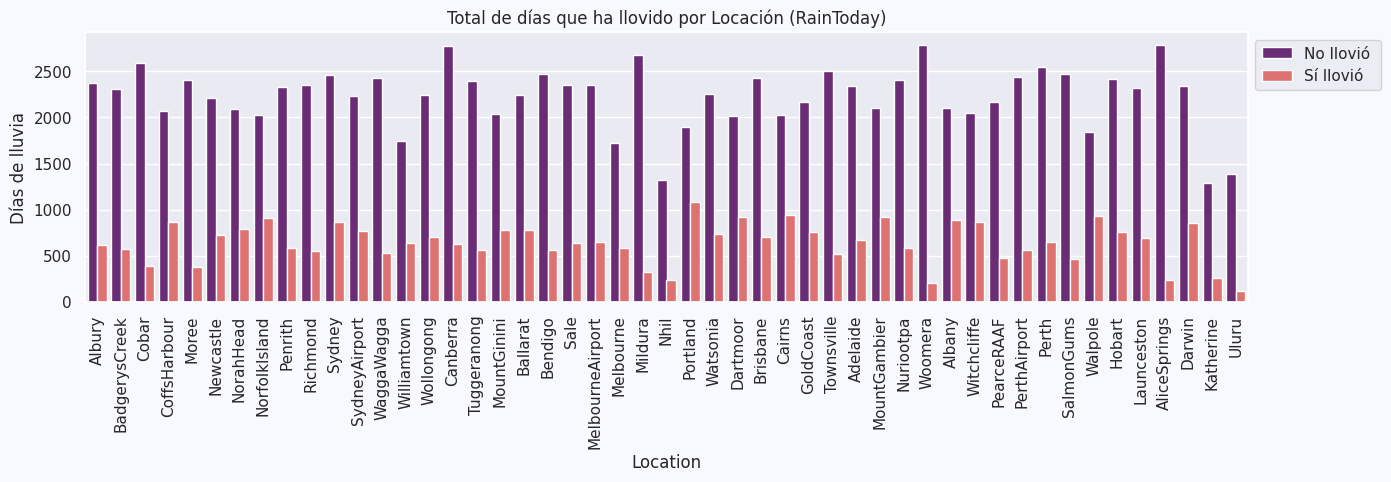

In [ ]:
#@title Total de días que ha llovido por Locación (RainToday)
display(HTML('<h3>Total de días que ha llovido por Locación</h3> <hr>'))
plt.figure(figsize=(15,3.5))
sns.set_theme(style='darkgrid',font='sans-serif', font_scale=1,
              rc={'figure.facecolor': 'ghostwhite'})
graf=sns.countplot(x=data['Location'], hue=data['RainToday'] ,palette='magma')
graf.set(xlabel="Location", ylabel="Días de lluvia",title="Total de días que ha llovido por Locación (RainToday)")
plt.xticks(rotation='vertical')
plt.legend(labels = [ 'No llovió ','Sí llovió'])
sns.move_legend(graf, "upper left", bbox_to_anchor=(1, 1))
plt.show()

#Comentario
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

> En todas las locaciones se encuentra más días en los que no ha llovido. Así mismo, se puede notar que las distribuciones de ambas posibilidades, no presentan grandes variaciones entre si.

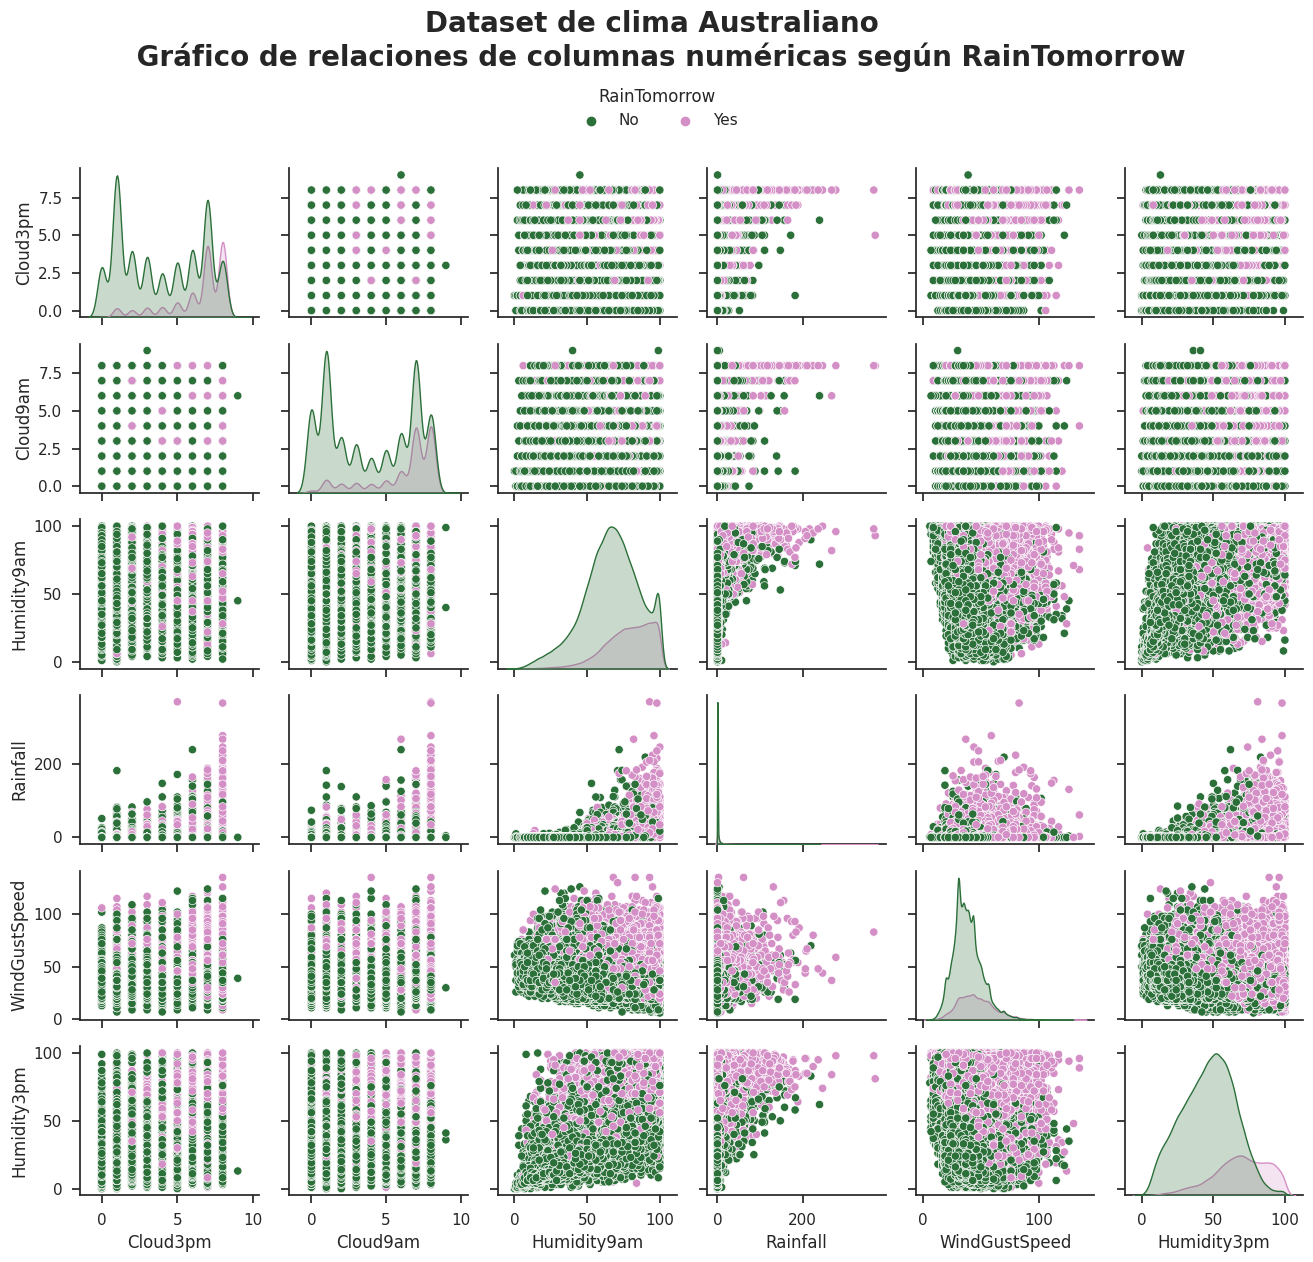

In [ ]:
#@title Correlación entre columnas numéricas y RainTomorrow
filter_distribution = data[['RainTomorrow', 'Cloud3pm', 'Cloud9am', 'Humidity9am', 'Rainfall', 'WindGustSpeed', 'Humidity3pm']]
sns.set_theme(style="ticks")
dist = sns.pairplot(filter_distribution, hue="RainTomorrow", palette='cubehelix', height=2)
plt.suptitle("Dataset de clima Australiano \n Gráfico de relaciones de columnas numéricas según RainTomorrow", y=1.05, fontsize=20, fontweight="bold")
sns.move_legend(
    dist, "lower center",
    bbox_to_anchor=(.5, 0.94), ncol=3
)

plt.tight_layout()
plt.show()

In [ ]:
#@title Observación
#Comentario
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

>De modo general se puede decir que, con respecto a las relaciones entre ciertas columnas se puede observar que los puntos se encuentran más concentrados según si habrá lluvia o no, especificamente en:

*   Humidity9pm x WindGustSpeed: En este caso se observa que los puntos etiquetados como "yes" se encuentran en su mayoría en la parte superior del gráfico, pudiendo indicar que en el día anterior al día con lluvia ,tanto la humedad como la velocidad de ráfaga aumentan.

*   Humidity3pm x WindGustSpeed: Se observa que los puntos que indican que sí lloverá, se encuentran en la parte superior del gráfico, pudiendo indicar que en el día anterior la humedad a las 3 de la tarde suele ser mayor junto con la velocidad del viento, cuando si llueve al día siguiente.

*   Humidity3pm x Cloud3pm: Se aprecia que a medida que la cobetura de las nubes a las 9am es mayor, también lo es la humedad en los días que si lloverá.

>En el caso de la distribución mostrada en la diagonal principal, principalmente se muestra que las variables estan representadas desigualmente.

>La distribución de las columnas cloud se encuentran representadas por números del 0 al 8, según el nivel de cobertura del cielo.

>Las columnas graficadas son las utilizadas en el modelado posterior.

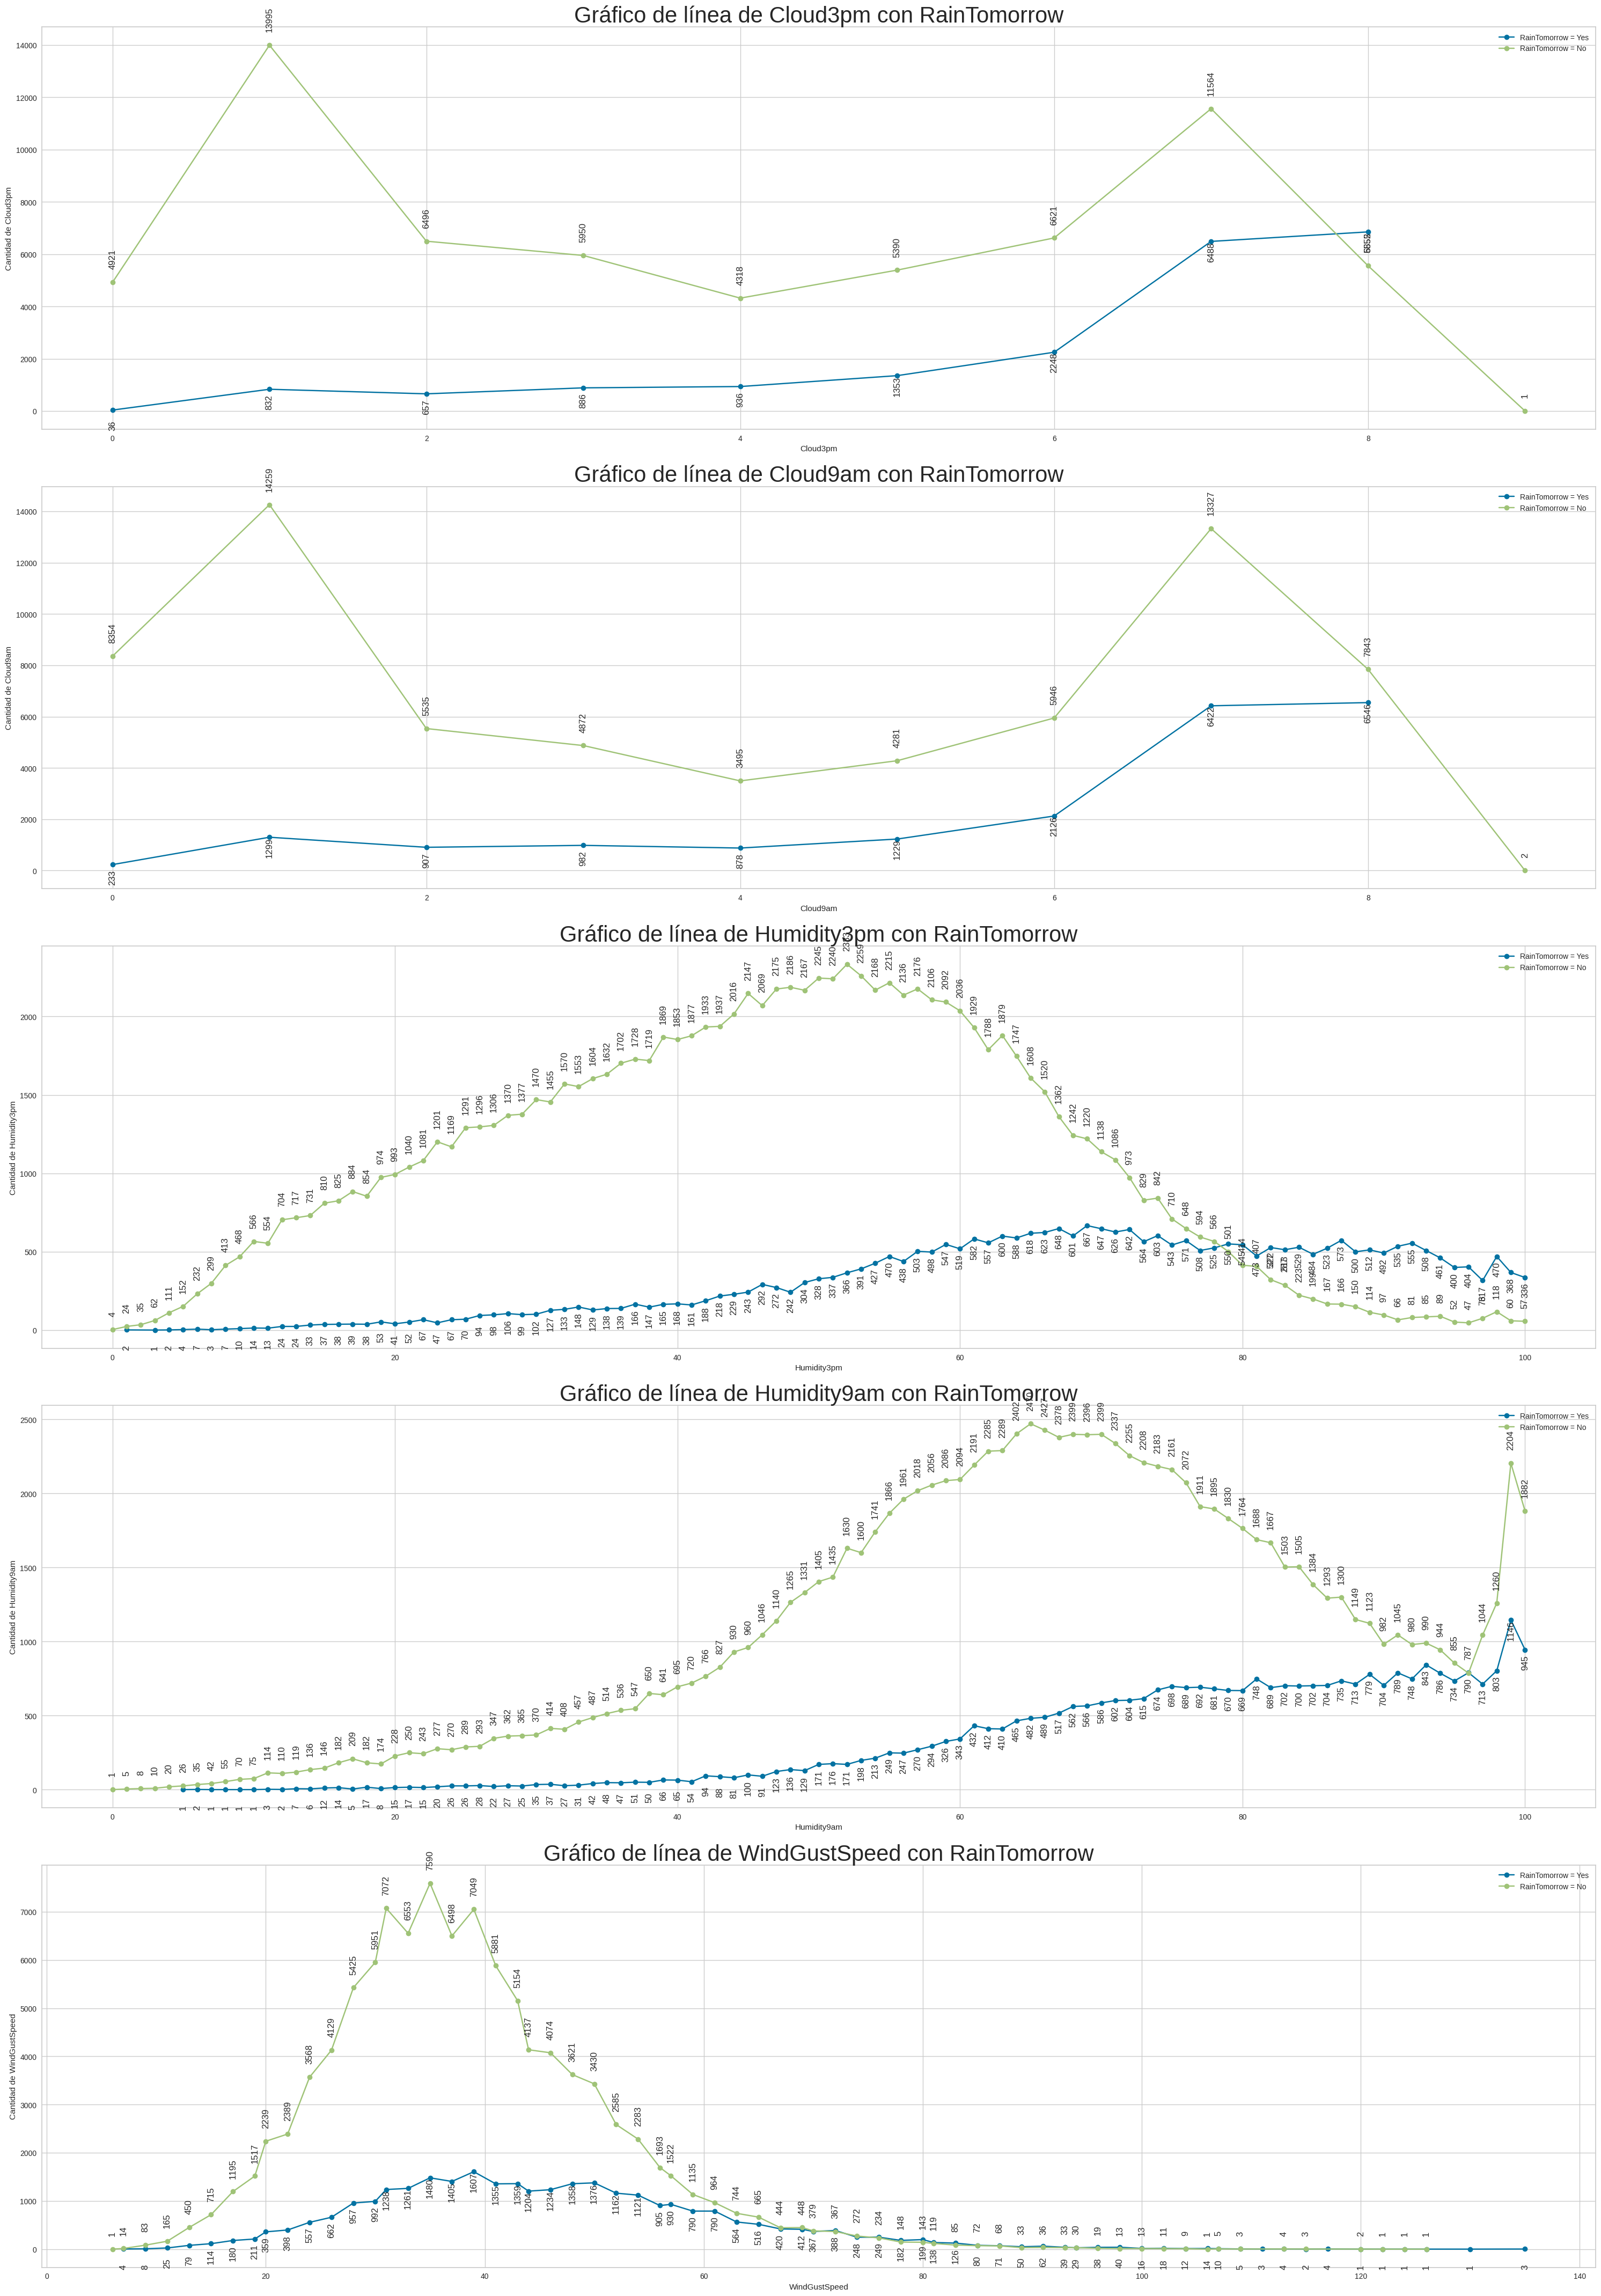

In [ ]:
#@title Cantidad de dias en los que llueve mañana
variables = ['Cloud3pm', 'Cloud9am', 'Humidity3pm', 'Humidity9am', 'WindGustSpeed']

fig, axs = plt.subplots(len(variables), 1, figsize=(30,43))

for i, variable in enumerate(variables):
    if variable == 'RainTomorrow':
        continue

    filtered_data_yes = data[data['RainTomorrow'] == 'Yes']
    filtered_data_no = data[data['RainTomorrow'] == 'No']

    variable_counts_yes = filtered_data_yes[variable].value_counts().sort_index()
    variable_counts_no = filtered_data_no[variable].value_counts().sort_index()

    ax = axs[i]
    ax.plot(variable_counts_yes.index, variable_counts_yes.values, marker='o', linestyle='-', label='RainTomorrow = Yes')
    ax.plot(variable_counts_no.index, variable_counts_no.values, marker='o', linestyle='-', label='RainTomorrow = No')

    # Agregar etiquetas de recuento
    for x, y in zip(variable_counts_yes.index, variable_counts_yes.values):
        ax.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, -25), ha='center', rotation='vertical')
    for x, y in zip(variable_counts_no.index, variable_counts_no.values):
        ax.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 20), ha='center', rotation='vertical')

    ax.set_xlabel(variable)
    ax.set_ylabel(f'Cantidad de {variable}')
    ax.set_title(f'Gráfico de línea de {variable} con RainTomorrow',fontsize=(30))
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
#@title Observación
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

* Cloud3pm: El gráfico muestra que existe una pendiente positiva desde 6 a 8, lo que indica que a medida que la fracción de nubes aumenta, la cantidad de días que llueve mañana también aumenta. Además, cuando la fracción de nubes es igual a 1, se observa la mayor cantidad de días en los que no llueve el día siguiente.

* Cloud9am: El gráfico muestra patrones similares al anterior, donde la fracción de cielo cubierto por nubes a las 9 AM (Cloud9am) tiene una relación positiva, lo que indica que a medida que la fracción de nubes aumenta, también lo hace la cantidad de días que llueve mañana. Cuando la fracción de nubes es igual a 1, se registra la mayor cantidad de días en los que no llueve el día siguiente.

* Humidity3pm: El gráfico muestra una pendiente positiva entre la humedad a las 3 PM (Humidity3pm) y la cantidad de días que llueve mañana y los que no. Hay una pendiente positiva para los días en los que no llueve, alcanzando su máximo en 52 con una cantidad de 2333 días. En contraste, para los días en los que llueve, la pendiente también es positiva y alcanza su máximo en 69 con 667 días. Después de estos puntos, ambas pendientes se vuelven negativas. Es importante destacar que la cantidad de días con lluvia tiende a mantenerse más estable a medida que aumenta la humedad, mostrando una relación entre una humedad alta (a partir de 79) y los días en los que llueve mañana.

* Humidity9am: El gráfico muestra una pendiente positiva para los días en los que no llueve mañana, desde el 0 alcanzando su punto máximo en 65. Por otro lado, para los días en los que llueve mañana, también se observa una pendiente positiva que alcanza su punto máximo en 99.

* WindGustSpeed: En el gráfico se observa una pendiente positiva para los días en los que no llovió mañana, alcanzando su punto máximo en 35 con una cantidad de 7590 días. Para los días en los que sí llovió, la pendiente también es ascendente y alcanza su punto máximo en 39 con un máximo de 1607 días. Después de estos puntos, la pendiente se vuelve negativa tanto para los días en los que llueve como para los días sin lluvia, desde un rango de velocidad de ráfaga de viento de 36 en adelante.


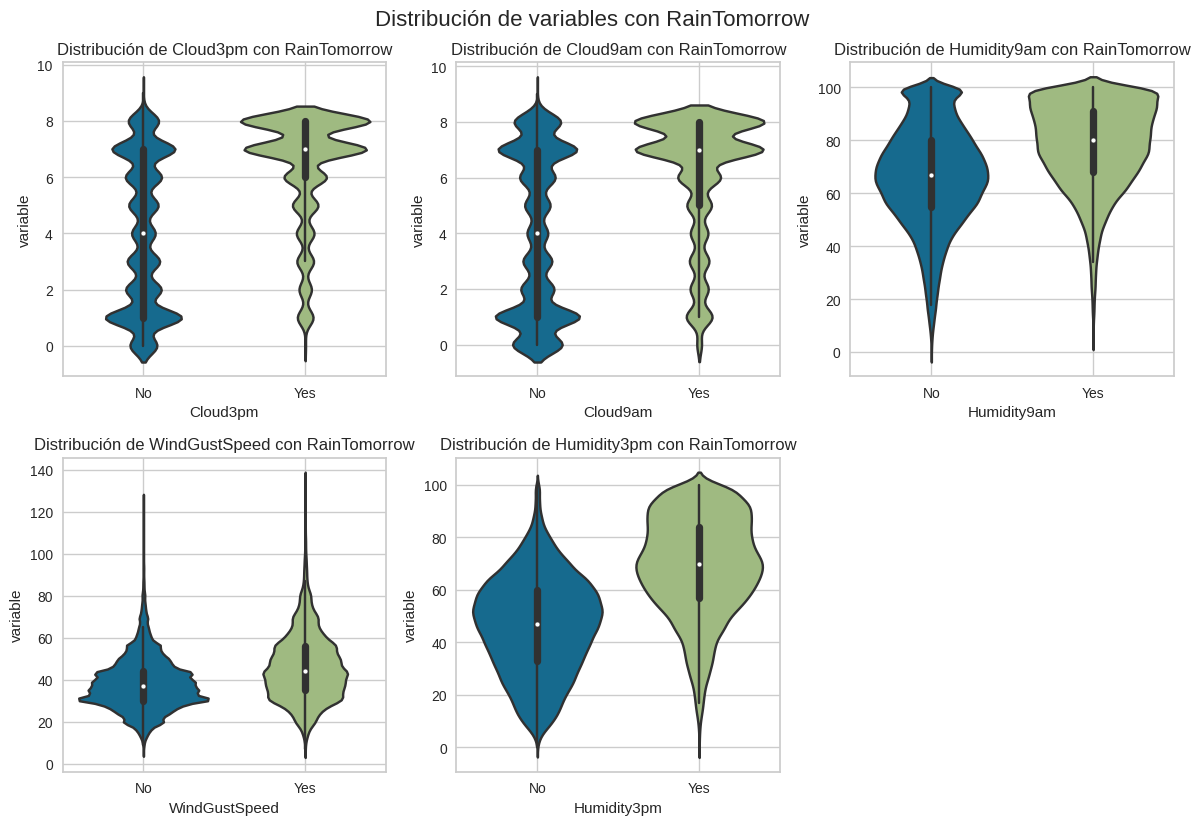

In [ ]:
#@title Distribución de variables con RainTomorrow
variables = [ 'Cloud3pm', 'Cloud9am', 'Humidity9am','WindGustSpeed', 'Humidity3pm']

fig, axs = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('Distribución de variables con RainTomorrow', fontsize=16)

for i, variable in enumerate(variables):
    filtered_data = data[data[variable].notnull()]


    if len(filtered_data) > 0:
        ax = axs[i // 3, i % 3]
        sns.violinplot(data=filtered_data, x="RainTomorrow", y=variable, ax=ax)
        ax.set_xlabel(variable)
        ax.set_ylabel('variable')
        ax.set_title(f'Distribución de {variable} con RainTomorrow')
        ax.grid(True)

if len(variables) < 9:
    for j in range(len(variables), 9):
        fig.delaxes(axs[j // 3, j % 3])

plt.tight_layout()
plt.show()


In [ ]:
#@title Observación
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

* En el gráfico de violín de Cloud3pm con RainTomorrow en los días de mañana que no lloverá el rango de intercuartílico es mayor a los días de mañana que sí lloverá.

* En el gráfico de violín de Cloud9pm con RainTomorrow en los días de mañana que no lloverá la mediana es 4 y en los días de mañana que sí lloverá es 7.

* En el gráfico de violín de Humidity9am con RainTomorrow en los días de mañana que no lloverá la frecuencia es mayor entre 60 y 80 y en los días de mañana que sí lloverá entre 80 y 100.

* En el gráfico de violín de WindGustSpeed con RainTomorrow en los días de mañana que no lloverá el Intervalo de confianza del 95% es menor a los días de mañana en los que sí lloverá.

* En el gráfico de violín de Humidity3pm con RainTomorrow en los días de mañana que no lloverá la mediana es 50 y en los días de mañana que sí lloverá 70.


##Preguntas

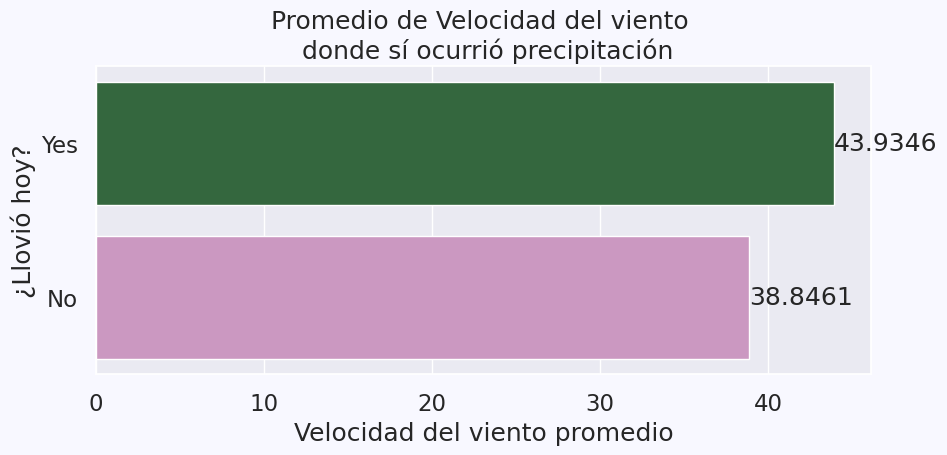

RainToday
Yes    43.934603
No     38.846056
Name: WindGustSpeed, dtype: float64

In [ ]:
#@title 1.¿Cuál es la velocidad de viento promedio (WindGustSpeed ) durante el día donde sí ocurrió precipitación(RainToday)?
mean =data.groupby('RainToday')['WindGustSpeed'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,4))
sns.set_theme(style='darkgrid', font='sans-serif', font_scale=1.5,
              rc={'figure.facecolor': 'ghostwhite'})
graf=sns.barplot( data=data,x=mean, y=mean.index,
                palette='cubehelix')
graf.set(ylabel="Lluvia", xlabel="Velocidad del viento promedio",title="Promedio de Velocidad del viento \n donde sí ocurrió precipitación")
for i in graf.containers:
    graf.bar_label(i,)
plt.show()
display(mean)
#Comentario
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

> Se puede observar que el promedio de la velocidad del viento más fuerte dentro de las 24 horas en los que sí hubo precipitación fue de 43.56 km/hr aproximadamente. Contrario a los días en los que no hubo precipitación, donde la velocidad de ráfaga fue más baja.

In [ ]:
#@title 2.¿Cuál es la mediana de la temperatura mínima(MinTemp) en grados celsius del siguiente día con y sin lluvia(RainTomorrow)?
data.groupby('RainTomorrow')['MinTemp'].mean()

RainTomorrow
No     11.897675
Yes    13.186890
Name: MinTemp, dtype: float64

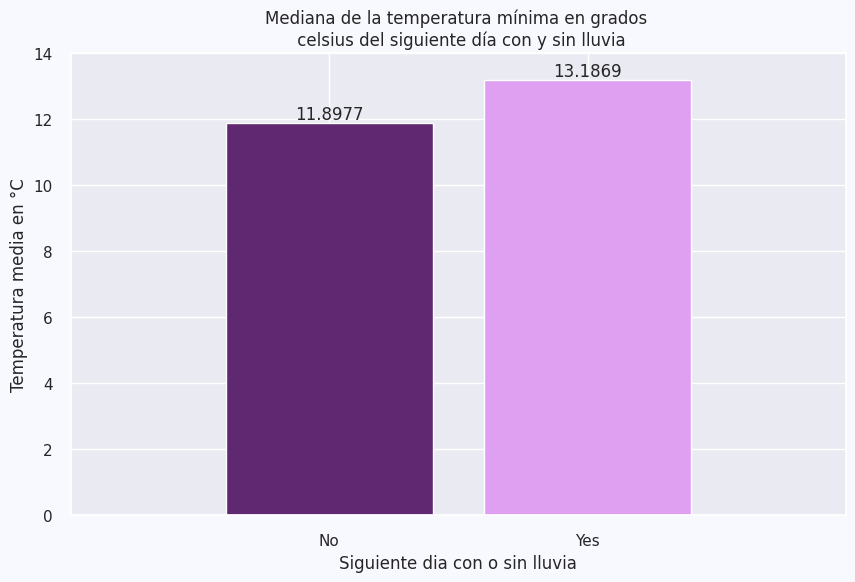

In [ ]:
#@title ¿Cual es la mediana de la temperatura minima del siguiente dia, con y sin lluvia?
plt.figure(figsize=(10,6))
total = data.groupby('RainTomorrow')['MinTemp'].mean()
plt.bar(total.index, total, color=["#5F2870","#DFA0F2"])
plt.title('Mediana de la temperatura mínima en grados \n celsius del siguiente día con y sin lluvia')
ax = plt.subplot()
ax.set_xlabel('Siguiente dia con o sin lluvia')
ax.set_ylabel('Temperatura media en °C')
plt.axis([-1,2,0,14])
for i in ax.containers:
    ax.bar_label(i,)
plt.show()
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

>Se puede observar que la mediana de la temperatura del dia siguiente cuando no llueve es de 12°c aproximadamente y la mediana del dia siguiente cuando si llueve es de 13°c aproximadamente

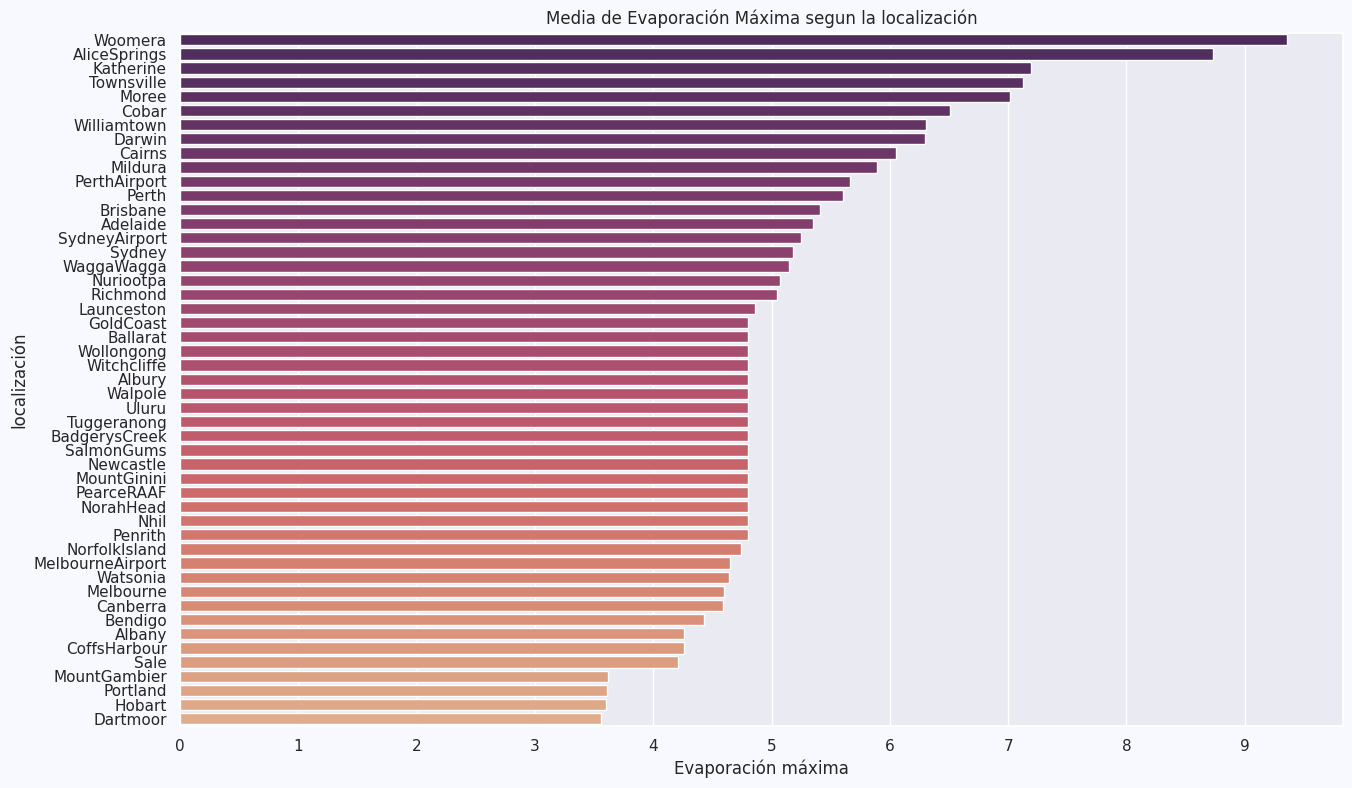

In [ ]:
#@title 3.¿Cuál es el promedio de evaporación(Evaporation) según ubicación(Location)?
mean =Data_filter.groupby('Location')['Evaporation'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,9))
sns.set_theme(style='darkgrid', font='sans-serif', font_scale=1.0,
              rc={'figure.facecolor': 'ghostwhite'})
graf=sns.barplot( data=Data_filter,x=mean, y=mean.index,
                 palette='flare_r')
graf.set(xticks=np.arange(0,mean.max(),1),ylabel="localización", xlabel="Evaporación máxima",title="Media de Evaporación Máxima segun la localización")
plt.show()
#Comentario
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

>Se puede observar en el grafico el nivel maximo de evaporación segun la localización, en los cuales las ubicacion con mas evaporacion en la region de australia es Woommera es superior a 9 mm y las ubicaciones con menos de 4 mm de evaporación son MountGambier, Portland, Hobart y Dartmoor

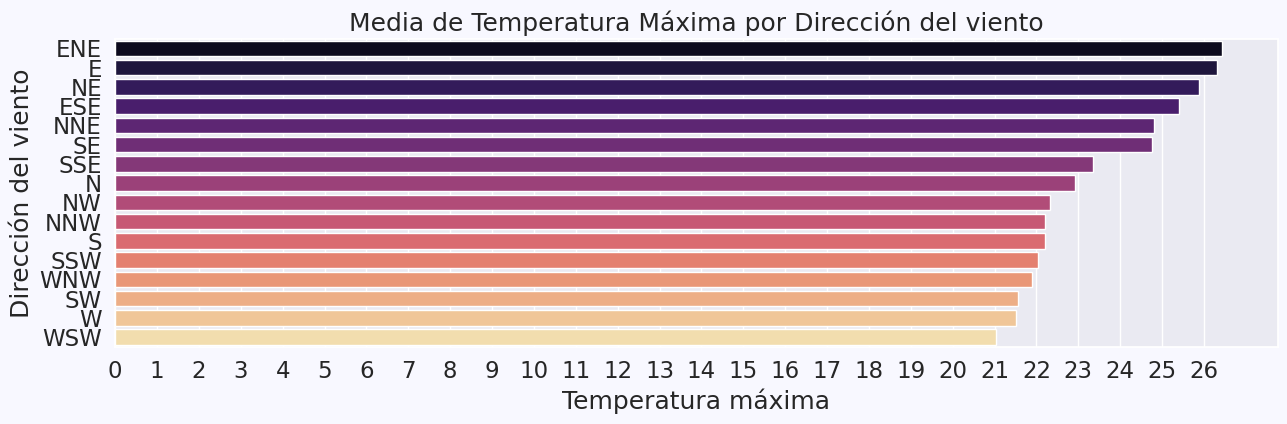

In [ ]:
#@title 4.¿Cuál es la media de la temperatura máxima del día (MaxTemp) según la dirección del viento(WindGustDir)?
mean =Data_filter.groupby('WindGustDir')['MaxTemp'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,4))
sns.set_theme(style='darkgrid', font='sans-serif', font_scale=1.5,
              rc={'figure.facecolor': 'ghostwhite'})
graf=sns.barplot( data=Data_filter,x=mean, y=mean.index,
                 palette='magma')
graf.set(xticks=np.arange(0,mean.max(),1),ylabel="Dirección del viento", xlabel="Temperatura máxima",title="Media de Temperatura Máxima por Dirección del viento")
plt.show()
#Comentario
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

> Dentro de esta visualización se observa que la dirección del viento con la media máxima de temperatura está por sobre los 26 grados Celcius, teniendo dirección este-noreste. Además, se muestra que aquellas ráfagas que se dirigen al este, suelen tener mayor media de temperatura máxima, contrarias a las ráfagas que se dirigen al oeste.

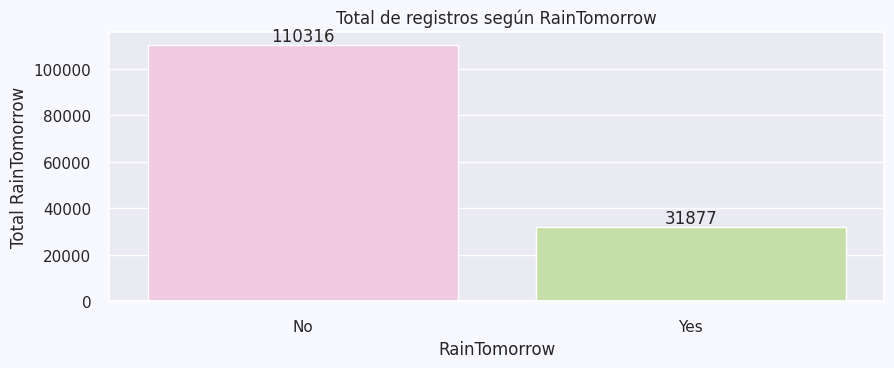

In [ ]:
#@title Distribución columna objetivo: RainTomorrow
display(HTML('<h3>Total Target</h3> <hr>'))
plt.figure(figsize=(10,3.5))
sns.set_theme(style='darkgrid',font='sans-serif', font_scale=1,
              rc={'figure.facecolor': 'ghostwhite'})
graf=sns.countplot(x=data['RainTomorrow'] ,palette='PiYG')
graf.set(xlabel="RainTomorrow", ylabel="Total RainTomorrow",title="Total de registros según RainTomorrow")
for i in graf.containers:
    graf.bar_label(i,)
plt.show()

#Comentario
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

> Se observa que la columna objetivo posee una distribución anormal, siendo la variable "No" casi el triple de "Yes", lo que puede afectar el modelo predictivo. Por esto, se considerará aplicar técnicas para equilibrar la data.

# FASE 3: Preparación de los datos

In [ ]:
#@title Moda
ModaMedia=data.copy()
for i in ModaMedia:
  if ModaMedia[i].dtypes == 'object':
    ModaMedia[i].fillna(ModaMedia[i].mode()[0], inplace = True)
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

> Para imputar los valores nulos de columnas categóricas se utilizará la moda.

In [ ]:
#@title Media/Mediana
def find_outliers_IQR(ModaMedia):
      q1=ModaMedia.quantile(0.25)
      q3=ModaMedia.quantile(0.75)
      IQR=q3-q1
      outliers = ModaMedia[((ModaMedia<(q1-1.5*IQR)) | (ModaMedia>(q3+1.5*IQR)))]
      return outliers
for colName in ModaMedia:
    if ModaMedia[colName].dtypes == 'float' or ModaMedia[colName].dtypes == 'int':
        #print("number of mode:"+ str(colName))
        outliers = find_outliers_IQR(ModaMedia[colName])
        if len(outliers) >0 and ModaMedia[colName].isna().sum() !=0 :
          #print("number of outliers:"+ str(len(outliers)),colName)
          ModaMedia[colName] = ModaMedia[colName].fillna(ModaMedia[colName].median())
          print(f'Median: {colName}')
        elif len(outliers) == 0 and ModaMedia[colName].isna().sum() !=0:
          ModaMedia[colName] = ModaMedia[colName].fillna(ModaMedia[colName].mean())
          print(f'Mean: {colName}')
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

Median: MinTemp
Median: MaxTemp
Median: Rainfall
Median: Evaporation
Mean: Sunshine
Median: WindGustSpeed
Median: WindSpeed9am
Median: WindSpeed3pm
Median: Humidity9am
Mean: Humidity3pm
Median: Pressure9am
Median: Pressure3pm
Mean: Cloud9am
Mean: Cloud3pm
Median: Temp9am
Median: Temp3pm


> Para imputar los valores nulos de columnas numéricas, se filtra las columnas que obtienen datos atípicos para aplicar la mediana sobre estos ya que no se ve afectada por estos mismos. Para el resto de columnas numéricas, sin datos atípicos, se aplica la media.

In [ ]:
#@title OneHotEncoding
categoria = pd.get_dummies(data=ModaMedia, columns=['Location','WindGustDir','WindDir9am','WindDir3pm'], drop_first=True)
categoria= categoria.drop(['RainToday','RainTomorrow','MinTemp','MaxTemp',\
                           'Sunshine','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm',
                           'Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','Evaporation','RISK_MM'],axis=1)
ModaMedia=pd.concat([ModaMedia, categoria], axis=1)
ModaMedia= ModaMedia.drop(['Location','WindGustDir','WindDir9am','WindDir3pm','Date'],axis=1)
ModaMedia['RainToday'].replace(['Yes', 'No'],[1,0], inplace=True)
ModaMedia['RainTomorrow'].replace(['Yes', 'No'],[1,0], inplace=True)
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

>Debido a que las columnas categóricas presentes en el dataframe son de carácter nominal, se aplicará oneHotEncoder para ser transformadas y no influenciar el modelo.

>Dentro de estas columnas se encuentra la columnas "Date" la cual será eliminada, ya que no la consideramos como relevante.

>Para las columnas de RainToday y RainTomorrow, se transformó los valores de "Yes" y "No" a 1 y 0 respectivamente, sin crear una nueva columna.

In [ ]:
#@title MinMaxScaler
minmax_scaler = MinMaxScaler()
numeric_features = ModaMedia.describe().columns
# Luego "entrenamos" con los datos para obtener los parámetros del escalamiento
minmax_scaler.fit(ModaMedia[numeric_features])
# Finalmente aplicamos el escalamiento
array_scaler_min_max = minmax_scaler.transform(ModaMedia[numeric_features])
df_minmax = pd.DataFrame(array_scaler_min_max)
df_minmax.columns = ModaMedia[numeric_features].columns
df_minmax
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

> Puesto a que las variables son medidas en distintas escalas y la distribución de los datos no es normal (Media=0 y std=1) debido a que los rangos de los valores se encuentran dispersos, estas no contribuirán de igual manera al modelo predictivo. Por esto, para el modelado de datos se consideró normalizar sus valores, específicamente se utilizará MinmaxScaler, el cual escala los valores en un rango dado (0,1).

>

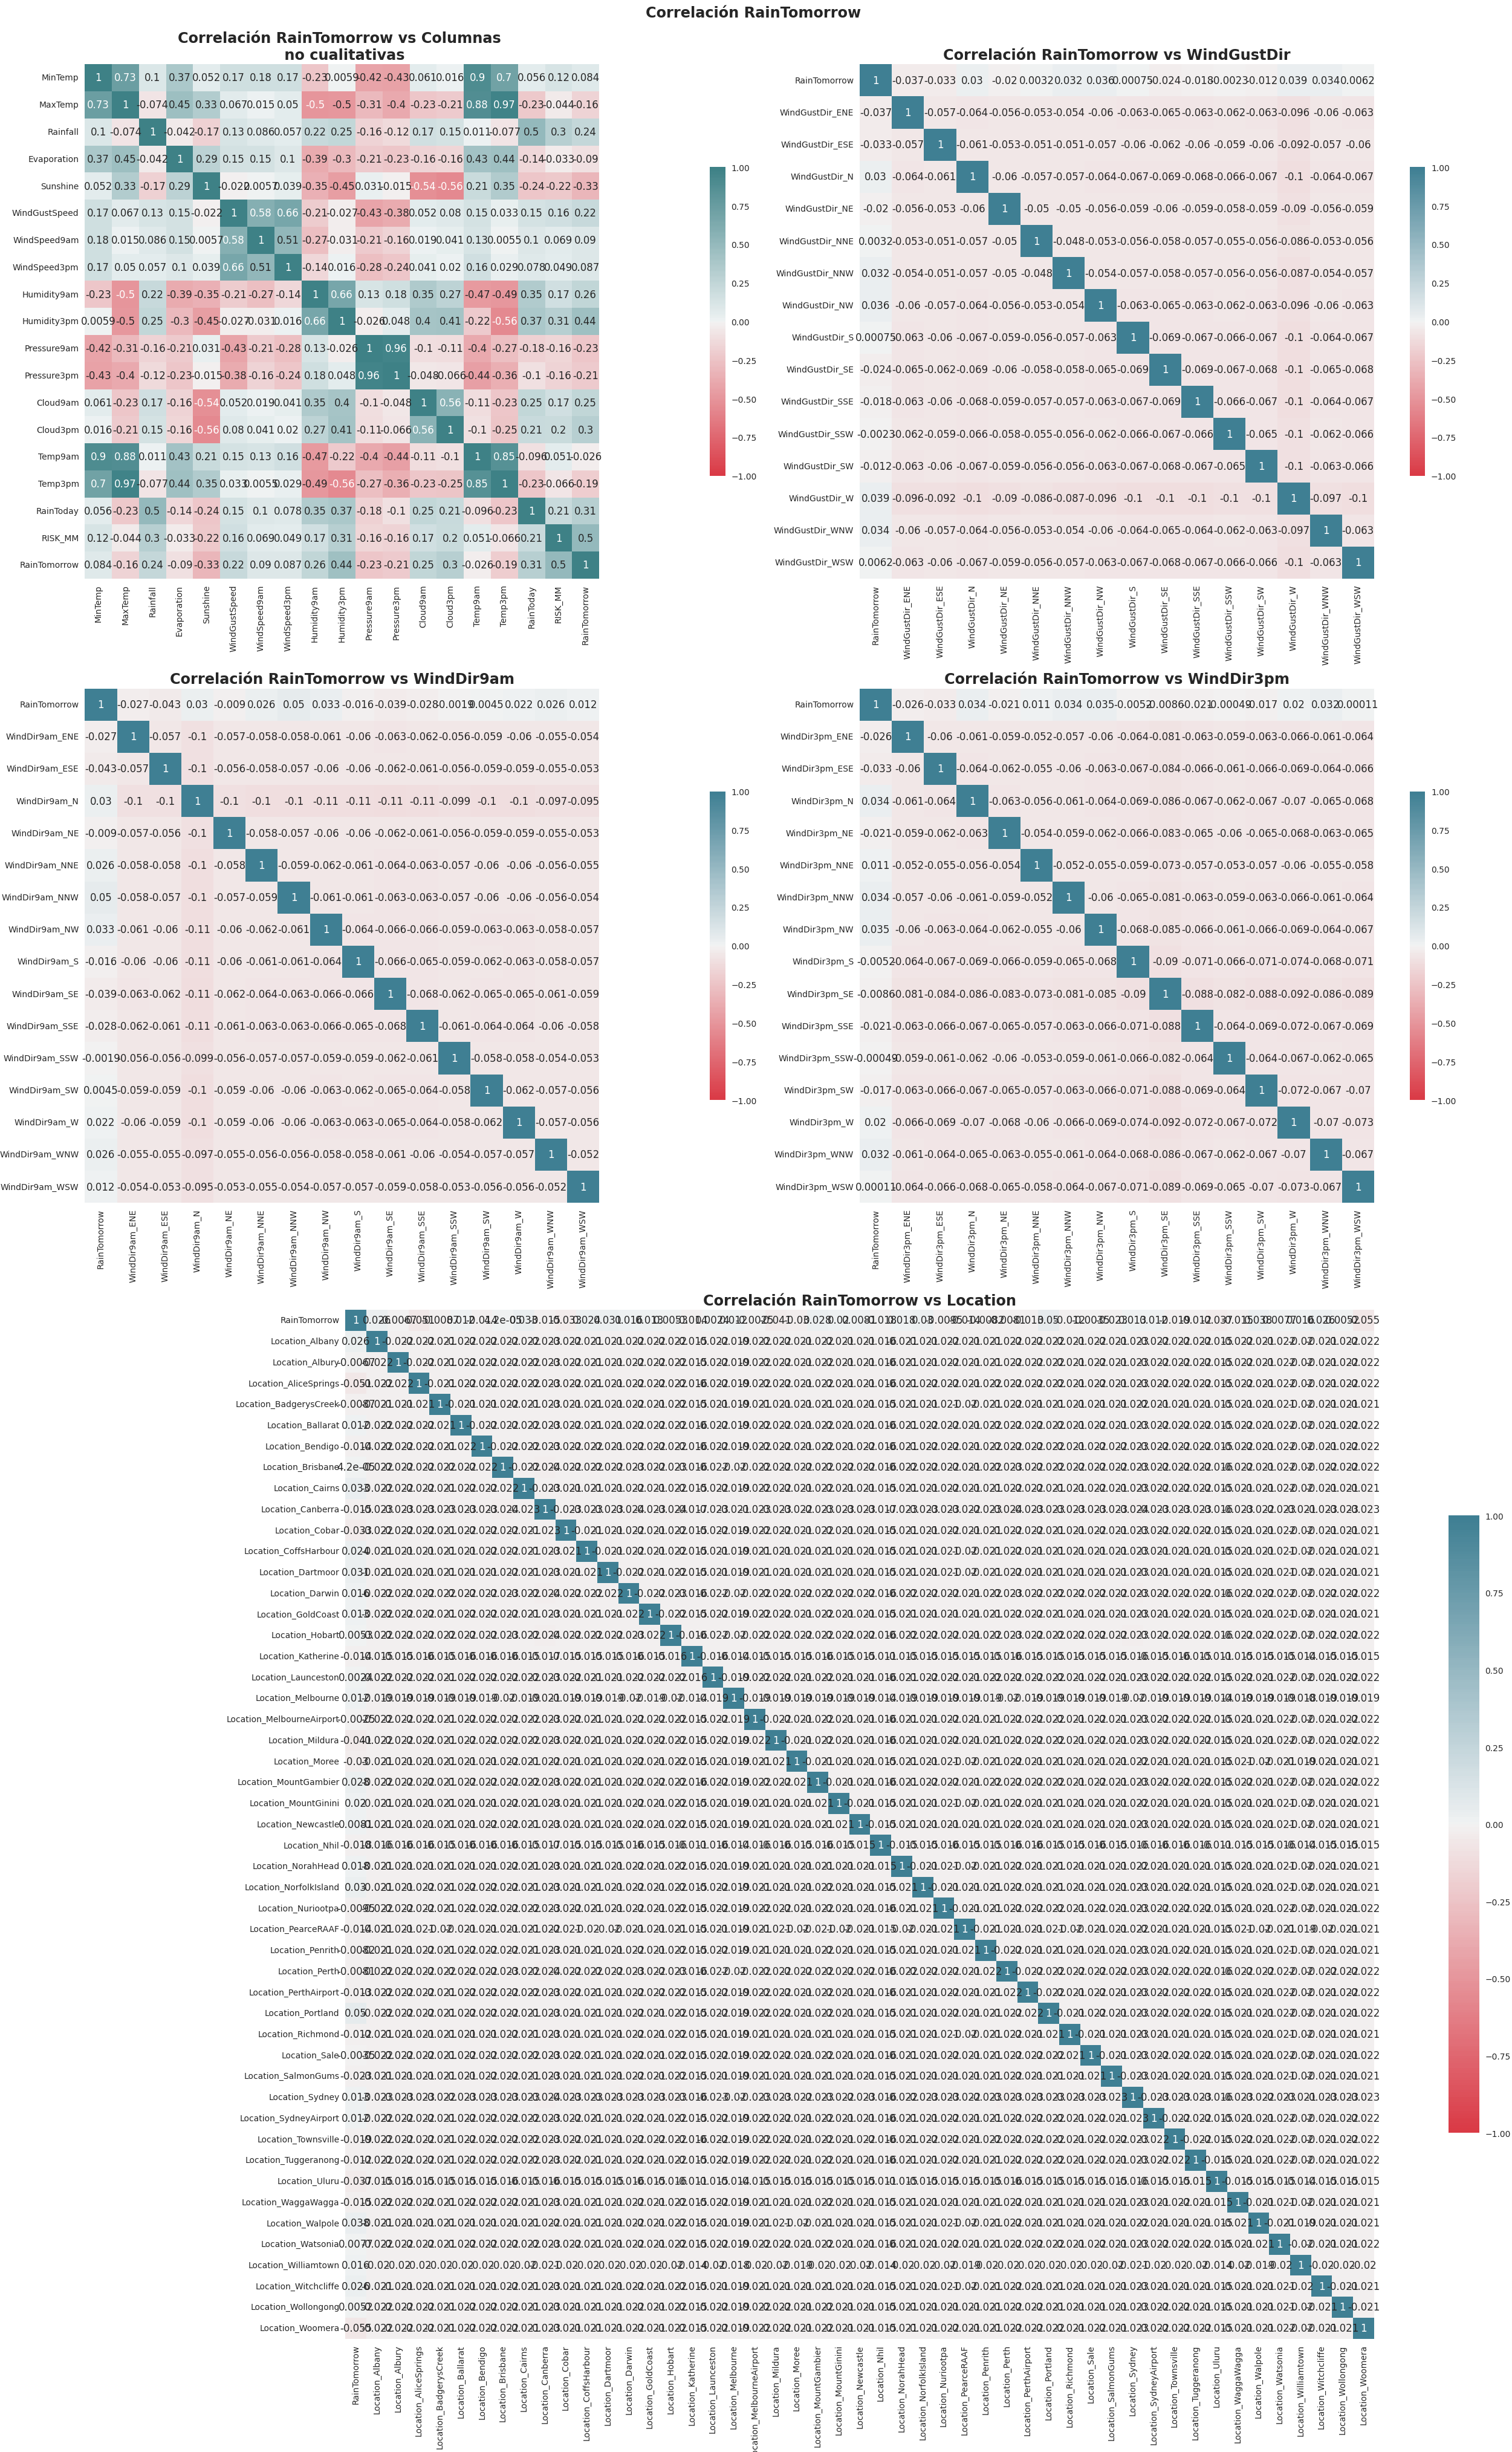

In [ ]:
#@title Correlación columnas vs RainTomorrow
filtro_Location = df_minmax.filter(regex ="Location|RainTomorrow", axis = 1)
filtro_WindGustDir = df_minmax.filter(regex ="WindGustDir|RainTomorrow", axis = 1)
filtro_WindDir9am = df_minmax.filter(regex ="WindDir9am|RainTomorrow", axis = 1)
filtro_WindDir3pm = df_minmax.filter(regex ="WindDir3pm|RainTomorrow", axis = 1)
filtro_noCual=df_minmax.filter(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'])

#mapa
corr_Location = filtro_Location.corr()
corr_WindGustDir = filtro_WindGustDir.corr()
corr_WindDir9am = filtro_WindDir9am.corr()
corr_WindDir3pm = filtro_WindDir3pm.corr()
corr_noCual = filtro_noCual.corr()

fig = plt.figure(figsize=(25,40),constrained_layout=True)
fig.suptitle("Correlación RainTomorrow", y=1.01, fontweight='bold',fontsize='x-large')
ax1 = plt.subplot2grid((4, 2), (0,0))
ax2 = plt.subplot2grid((4, 2), (0,1))
ax3 = plt.subplot2grid((4, 2), (1,0))
ax4 = plt.subplot2grid((4, 2), (1,1))
ax5 = plt.subplot2grid((4, 2), (2,0),colspan=2, rowspan=2)

sns.heatmap(corr_noCual, ax=ax1 ,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(10, 200, n=200),square=True,annot=True,cbar_kws={"shrink": 0.6})
sns.heatmap(corr_WindGustDir,ax=ax2, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(10, 220, n=200),square=True,annot=True,cbar_kws={"shrink": 0.6})
sns.heatmap(corr_WindDir9am,ax=ax3, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(10, 220, n=200),square=True,annot=True,cbar_kws={"shrink": 0.6})
sns.heatmap(corr_WindDir3pm,ax=ax4, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(10, 220, n=200),square=True,annot=True,cbar_kws={"shrink": 0.6})
sns.heatmap(corr_Location,ax=ax5, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(10, 220, n=200),square=True,annot=True,cbar_kws={"shrink": 0.6})

ax1.set_title("Correlación RainTomorrow vs Columnas \n no cualitativas", fontweight='bold',fontsize='x-large')
ax2.set_title("Correlación RainTomorrow vs WindGustDir", fontweight='bold',fontsize='x-large')
ax3.set_title("Correlación RainTomorrow vs WindDir9am", fontweight='bold',fontsize='x-large')
ax4.set_title("Correlación RainTomorrow vs WindDir3pm", fontweight='bold',fontsize='x-large')
ax5.set_title("Correlación RainTomorrow vs Location", fontweight='bold',fontsize='x-large')
sns.set(font_scale=0.8)
#plt.rcParams['figure.figsize'] = (40, 10)
#plt.rcParams["figure.autolayout"] = True
#plt.rcParams['font.size'] = 2
plt.show()

In [ ]:
#@title Observación
#Comentario
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

> Para visualizar si existe correlación entre las columnas categóricas que fueron transformadas con oneHoteEncoder y la columna objetivo "RainTomorrow", se creó un mapa de calor por cada una de las columnas transformadas (Location, WindGustDir, WindDir9am y WindDir3pm) se observa que no existe una correlación importante entre las columnas, por lo que no serán consideradas durante el modelado.

> Por otro lado, entre las columnas no categóricas y "RainTomorrow" si se observa una correlación considerable con las columnas: 'RainToday' , 'Cloud3pm' , 'Cloud9am' ,  'Humidity9am' , 'Humidity3pm' , 'Rainfall' , 'RISK_MM' y 'WindGustSpeed', las cuales serán consideradas para el modelado.


In [ ]:
#@title Filtros

filter_1 = df_minmax.filter(['RainToday','RainTomorrow','Cloud3pm','Cloud9am', 'Humidity9am','Humidity3pm','Rainfall'])
filter_2 = ModaMedia[['Rainfall','RainTomorrow','Humidity9am','Humidity3pm','Cloud3pm','WindGustSpeed','RainToday']]
filter_3 = ModaMedia[['RainTomorrow','Cloud3pm','Cloud9am','Humidity9am','Rainfall','WindGustSpeed','Humidity3pm']]
#Comentario
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

>Dada las columnas que se consideraron relevantes en el análisis del mapa de calor anterior, se crearon tres filtros diferentes para ser probados en el modelado.

# FASE 4: Modelado


# Generación modelos predictivos

## Objetivo
Determinar si lloverá al día siguiente(RainTomorrow)

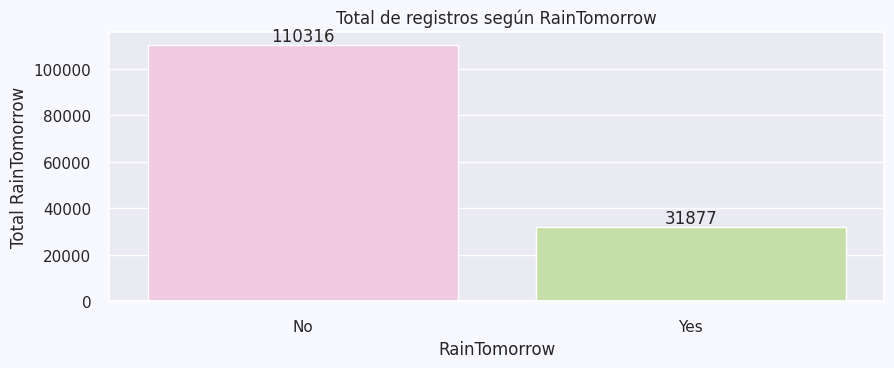

In [ ]:
#@title Distribución columna objetivo: RainTomorrow
display(HTML('<h3>Total Target</h3> <hr>'))
plt.figure(figsize=(10,3.5))
sns.set_theme(style='darkgrid',font='sans-serif', font_scale=1,
              rc={'figure.facecolor': 'ghostwhite'})
graf=sns.countplot(x=data['RainTomorrow'] ,palette='PiYG')
graf.set(xlabel="RainTomorrow", ylabel="Total RainTomorrow",title="Total de registros según RainTomorrow")
for i in graf.containers:
    graf.bar_label(i,)
plt.show()

#Comentario
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

> Se observa que la columna objetivo posee una distribución anormal, siendo la variable "No" casi el triple de "Yes", lo que puede afectar el modelo predictivo. Por esto, se considerará aplicar técnicas para equilibrar la data.

## Evolución Modelo 1

In [ ]:
#@title AdaBoost, Árbol de decisión y SMOTE
X = filter_1.drop(['RainTomorrow'],axis=1) # Variables independientes
y = filter_1['RainTomorrow'] # Variable dependiente

#@title Árbol de decisión con Emsamblado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

smt = SMOTE(random_state=42)

#Balanceando la data con SMOTETOMEK utilizando el dataframe de entrenamiento
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

#Entrenar Arbol de decisión con la data ya balanceada
decisionT_model = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8, min_samples_split=3)
decisionT_model.fit(X_resampled, y_resampled)

# Realizar predicciones con Árbol de decisión
Y_pred_aT = decisionT_model.predict(X_test)

# Modelo es pasado por adaboost
Adaboost_model = AdaBoostClassifier(decisionT_model, n_estimators=10)
Adaboost_model.fit(X_resampled, y_resampled)
Y_pred_aT = Adaboost_model.predict(X_test)

Reporte de clasificacion
------------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     22098
           1       0.58      0.59      0.58      6341

    accuracy                           0.81     28439
   macro avg       0.73      0.73      0.73     28439
weighted avg       0.81      0.81      0.81     28439



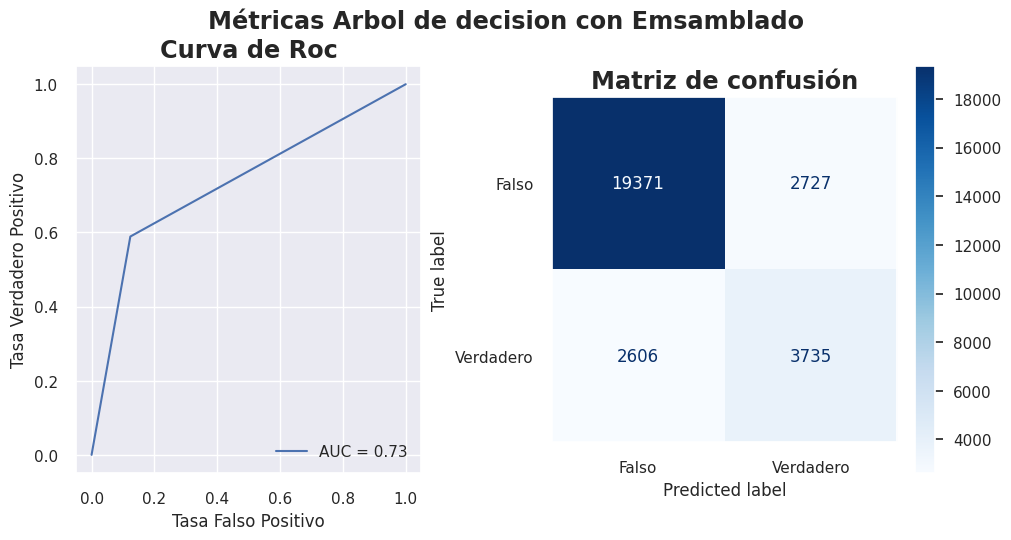

In [ ]:
#@title Medidas AdaBoost, Árbol de decisión y SMOTE
encabezado='Reporte de clasificacion'
print(encabezado)
print('-'*len(encabezado))
print(classification_report(y_test, Y_pred_aT))

#Historial
history_roc = []
history_f1 = []
#Grafico
fig = plt.figure(figsize=(10,5),constrained_layout=True)
fig.suptitle("Métricas Arbol de decision con Emsamblado", y=1.05, fontweight='bold',fontsize='x-large')
ax1 = plt.subplot2grid((1, 2), (0,0))
ax2 = plt.subplot2grid((1, 2), (0,1))

# Curva ROC
fpr, tpr, Adaboost_model = metrics.roc_curve(y_test,  Y_pred_aT)

arb_auc = metrics.auc(fpr, tpr)
arb_rocPlot = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=arb_auc)
arb_rocPlot.plot(ax=ax1)
ax1.set_ylabel('Tasa Verdadero Positivo')
ax1.set_xlabel('Tasa Falso Positivo')
ax1.set_title("Curva de Roc", fontweight='bold',fontsize='x-large')

# Matriz de confusion
plt.grid(False)
conf_matrix = confusion_matrix(y_test, Y_pred_aT)
arb_cM = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Falso', 'Verdadero'])
ax2.set_ylabel('Tasa Verdadero Positivo')
ax2.set_xlabel('Tasa Falso Positivo')
arb_cM.plot(cmap='Blues',ax=ax2, values_format='')
ax2.set_title("Matriz de confusión", fontweight='bold',fontsize='x-large')

sns.set(font_scale=1)
plt.show()

#Historial
history_roc.append(roc_auc_score(y_test, Y_pred_aT))
history_f1.append(f1_score(y_test, Y_pred_aT, average='macro'))
#Comentario
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

*  3735 Verdaderos Positivos (TP):El modelo predijo correctamente la clase positiva.

*   2727 Falsos Positivos (FP):El modelo predijo incorrectamente la clase positiva.

*   2606 Falsos Negativos (FN):El modelo predijo incorrectamente la clase negativa.

*   19371 Verdaderos Negativos (TN):El modelo predijo correctamente la clase negativa. y negativas.


> * **Precisión**: Posee una precisión de 88% y 58% en los valores 0 y 1 respectivamente, lo que indica que estos valores son verdaderos positivos en un 88% y 58%.
* **Recall (exhaustividad)**: Indica que un 88%(0) y 59%(1) de las observaciones positivas fueron indicadas correctamente.
* **Accuracy (Exactitud)**: Obtuvo un 81%, indicando que el modelo acertó de manera correcta para ambos valores(0,1).
* **F1-score (promedio armónico de precision y recall)**: El modelo posee un 88%(0) y 58%(1) de F1-score, lo que indica que su capacidad de capturar valores positivos(recall) y ser exacto con los casos capturados(precision) es buena.
* **AUC (Área Bajo la Curva)**: Es de 73% indicando que la capacidad del modelo para distinguir entre clases positivas y negativas es excelente.

### Modelo final n°1: Modelo AdaBoost/SMOTE

In [ ]:
#@title AdaBoost, GridSearch, Árbol de decisión y SMOTE
x_sm = filter_2.drop(['RainTomorrow'],axis=1)
y_sm = filter_2['RainTomorrow']
kf = KFold(n_splits=5, shuffle=False)
Xtrainmediana, Xtestmediana, Ytrainmediana, Ytestmediana = train_test_split(x_sm,y_sm,test_size=0.3,random_state=40)
mo = DecisionTreeClassifier()

param_ada = {"n_estimators": [1,5,50],
             'base_estimator__min_samples_leaf': [1, 3],
             'base_estimator__min_samples_split': [1, 5, 9],
             'base_estimator__max_leaf_nodes': [1, 5, 9]
             }

imba_pipeline = make_pipeline(SMOTE(k_neighbors = 10,random_state=45),
                              AdaBoostClassifier(mo))
cross_val_score(imba_pipeline, Xtrainmediana, Ytrainmediana, scoring='accuracy', cv=kf)
new_params = {'adaboostclassifier__' + key: param_ada[key] for key in param_ada}
grid_imba_ada = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='accuracy',
                        return_train_score=True)
grid_imba_ada.fit(Xtrainmediana, Ytrainmediana);
print("\u0332".join('AdaBoost'))
print("\033[95m".join('*Mejores parametros:')+'\033[0m',grid_imba_ada.best_params_)
print("\033[95m".join('*Mejor puntaje acc:')+'\033[0m',grid_imba_ada.best_score_)

A̲d̲a̲B̲o̲o̲s̲t
*Mejores parametros: {'adaboostclassifier__base_estimator__max_leaf_nodes': 9, 'adaboostclassifier__base_estimator__min_samples_leaf': 1, 'adaboostclassifier__base_estimator__min_samples_split': 5, 'adaboostclassifier__n_estimators': 50}
*Mejor puntaje acc: 0.8287938915959211


> **Proceso de AdaBoost:** El modelo inicialmente realizará una predicción de manera general en el dataset con un "weak learner", el modelo calculará los errores de predicción y asignará mayor peso a las predicciones incorrectas. Luego, realizará una nueva predicción dirigido a corregir estos errores. Posteriormente, volverá a repetir el proceso  hasta obtener el resultado esperado.

> **GridSearch:** Esta función ayuda a analizar los hiperparámetros establecidos para el entrenamiento del modelo predictivo(estimator) para escoger los más óptimos utilizando validación cruzada para cada una de las combinaciones de los hiperparámetros establecidos.

> Para equilibrar los datos se utilizará SMOTE, el cual crea nuevos datos sintéticos para introducir a la clase minoritaria, igualando la cantidad de datos con la clase mayoritaria, la columna a transformar será RainTomorrow.

> Para equilibrar los datos se utilizará en esta ocasión SMOTE, el cual crea nuevos datos sintéticos para introducir a la clase minoritaria, es este caso es "Yes".

> **Hiperparámetros escogidos:**
  * estimator: En este caso el estimador es el predeterminado, DecisionTreeClassifier.
  * n_estimators: Para este parámetro se asignó el valor predeterminado de 50, este indica el número en el cual el modelo dejará de ser mejorado, en caso de que el modelo llegue a tener entrenamiento perfecto, este se detendrá para así evitar overfitting.
  * base_estimator__min_samples_split: Es la distancia más corta entre la raíz del nodo y cualquiera de las hojas,se escogió 5.
  * base_estimator__max_leaf_nodes: Se refiere al número máximo de nodos sin hijos, para este parámetro se escogió 9.
  * base_estimator__min_samples_leaf: Se refiere al número mínimo de muestras requeridas en un nodo de hoja, para este parámetro se escogió 1.

METRICAS: AdaBoostClassifier
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89     33015
         1.0       0.63      0.49      0.55      9643

    accuracy                           0.82     42658
   macro avg       0.74      0.70      0.72     42658
weighted avg       0.81      0.82      0.81     42658



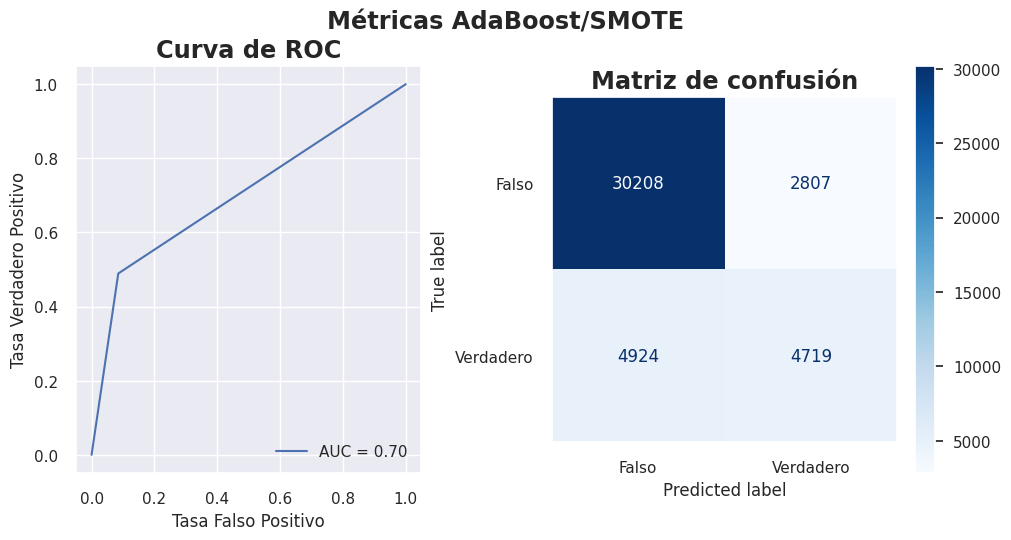

In [ ]:
#@title Medidas AdaBoost, GridSearch, Árbol de decisión y SMOTE
x_sm = filter_1.drop(['RainTomorrow'],axis=1)
y_sm = filter_1['RainTomorrow']
kf = KFold(n_splits=5, shuffle=False)
Xtrainmediana, Xtestmediana, Ytrainmediana, Ytestmediana = train_test_split(x_sm,y_sm,test_size=0.3,random_state=40)
mo = DecisionTreeClassifier(min_samples_split=5,max_leaf_nodes=9,max_depth=4,min_samples_leaf=1, random_state=1)
#mo.fit(Xmo, ymo)
#modelt = AdaBoostClassifier(mo,base_estimator__criteri= 'gini',base_estimator__splitter='best',n_estimators=1)
imba_pipeline_ada = make_pipeline(SMOTE(random_state=42),
                              AdaBoostClassifier(mo,n_estimators=50))

model_adasmote=imba_pipeline_ada.fit(Xtrainmediana, Ytrainmediana)
prediction_ada= model_adasmote.predict(Xtestmediana)

print("METRICAS: AdaBoostClassifier")
print(classification_report(Ytestmediana, prediction_ada))
#Grafico
fig = plt.figure(figsize=(10,5),constrained_layout=True)
fig.suptitle("Métricas AdaBoost/SMOTE", y=1.05, fontweight='bold',fontsize='x-large')
ax1 = plt.subplot2grid((1, 2), (0,0))
ax2 = plt.subplot2grid((1, 2), (0,1))

# Curva ROC
fpr, tpr, model = metrics.roc_curve(Ytestmediana,  prediction_ada)

ada_auc = metrics.auc(fpr, tpr)
ada_rocPlot = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=ada_auc)
ada_rocPlot.plot(ax=ax1)
ax1.set_ylabel('Tasa Verdadero Positivo')
ax1.set_xlabel('Tasa Falso Positivo')
ax1.set_title("Curva de ROC", fontweight='bold',fontsize='x-large')

# Matriz de confusion
plt.grid(False)
conf_matrix = confusion_matrix(Ytestmediana, prediction_ada)
ada_cM = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Falso', 'Verdadero'])
ax2.set_ylabel('Tasa Verdadero Positivo')
ax2.set_xlabel('Tasa Falso Positivo')
ada_cM.plot(cmap='Blues',ax=ax2, values_format='')
ax2.set_title("Matriz de confusión", fontweight='bold',fontsize='x-large')

sns.set(font_scale=1)
plt.show()

#Historial
history_roc.append(roc_auc_score(Ytestmediana, prediction_ada))
history_f1.append(f1_score(Ytestmediana, prediction_ada, average='macro'))

#Comentario
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

*  4719 Verdaderos Positivos (TP):El modelo predijo correctamente la clase positiva.

*   2807 Falsos Positivos (FP):El modelo predijo incorrectamente la clase positiva.

*   4924 Falsos Negativos (FN):El modelo predijo incorrectamente la clase negativa.

*   30208 Verdaderos Negativos (TN):El modelo predijo correctamente la clase negativa.

> * **Precisión**: Posee una precisión de 86% y 63% en los valores 0 y 1 respectivamente, lo que indica que estos valores son verdaderos positivos en un 86% y 63%.
* **Recall** (exhaustividad): Indica que un 91%(0) y 49%(1) de las observaciones positivas fueron indicadas correctamente.
* **Accuracy** (Exactitud): Obtuvo un 82%, indicando que el modelo acertó de manera correcta para ambos valores(0,1).
* **F1-score** (promedio armónico de precision y recall): El modelo posee un 89%(0) y 55%(1) de F1-score, lo que indica que su capacidad de capturar valores positivos(recall) y ser exacto con los casos capturados(precision) es buena.
* **AUC** (Área Bajo la Curva): Es de 70% indicando que la capacidad del modelo para distinguir entre clases positivas y negativas es excelente.

> Utilizando gridsearch para encontrar los mejores parámetros aumentó de 81% a 82% en comparación con el modelo anterior, pero disminuyó rendimiento en f1-score, medida que es más fiable en datasets desiquilibrados.

>

## Evolución Modelo 2

### Modelo previo n°2: Modelo Bosque Aleatorio/SMOTE

In [ ]:
#@title Bosque aleatorio y SMOTE
X = filter_3.drop(['RainTomorrow'],axis=1)
y = filter_3['RainTomorrow']

X_trainT, X_testT, y_trainT, y_test_T = train_test_split(X,y, test_size=0.3)

smt= SMOTE(random_state=42,k_neighbors=10)

#Balanceando la data con SMOTE utilizando el dataframe de entrenamiento
X_resT, y_resT = smt.fit_resample(X_trainT, y_trainT)

print(f'''Cambio de X pre SMOTE: {X.shape}
      Cambio de X post SMOTE: {X_resT.shape}''')

print('\nBalance clases:', y_resT.value_counts(normalize=True)*100)
print(y_resT.value_counts())

forestModel = RandomForestClassifier(max_depth=3, max_leaf_nodes=8, min_samples_split=3)
forestModel.fit(X_resT,y_resT)
Y_pred_r = forestModel.predict(X_testT)

#Comentario
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

Cambio de X pre SMOTE: (142193, 6)
      Cambio de X post SMOTE: (154358, 6)

Balance clases: 0    50.0
1    50.0
Name: RainTomorrow, dtype: float64
0    77179
1    77179
Name: RainTomorrow, dtype: int64


Para equilibrar los datos se utilizará en esta ocasión SMOTE, el cual crea nuevos datos sintéticos para introducir a la clase minoritaria, es este caso es "Yes".

Reporte de clasificacion
------------------------
              precision    recall  f1-score   support

           0       0.90      0.79      0.84     33137
           1       0.49      0.70      0.57      9521

    accuracy                           0.77     42658
   macro avg       0.69      0.74      0.71     42658
weighted avg       0.81      0.77      0.78     42658



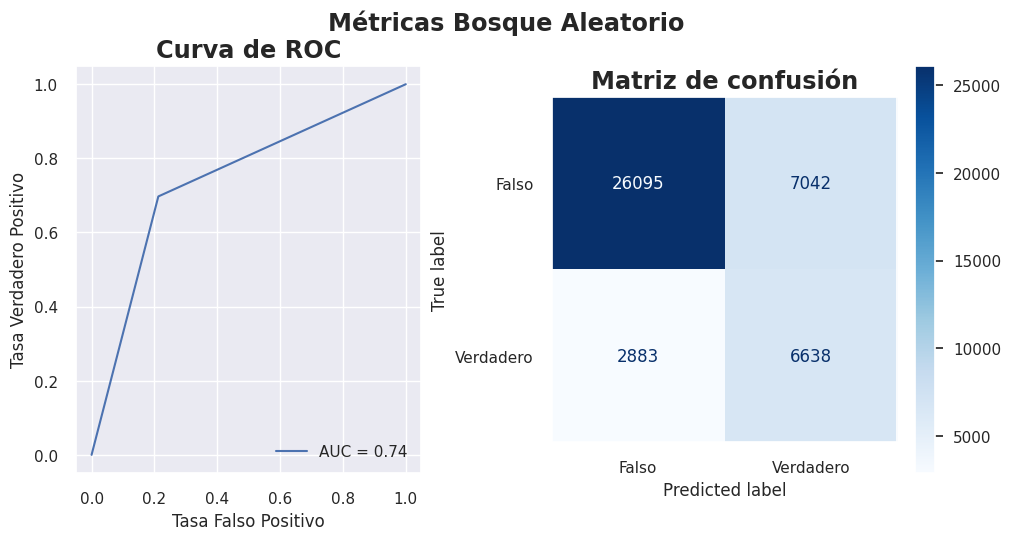

In [ ]:
#@title Medidas Bosque Aleatorio

encabezado='Reporte de clasificacion'
print(encabezado)
print('-'*len(encabezado))
print(classification_report(y_test_T, Y_pred_r))

#Grafico
fig = plt.figure(figsize=(10,5),constrained_layout=True)
fig.suptitle("Métricas Bosque Aleatorio", y=1.05, fontweight='bold',fontsize='x-large')
ax1 = plt.subplot2grid((1, 2), (0,0))
ax2 = plt.subplot2grid((1, 2), (0,1))

# Curva ROC
fpr, tpr, Adaboost_model = metrics.roc_curve(y_test_T, Y_pred_r)

arb_auc = metrics.auc(fpr, tpr)
arb_rocPlot = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=arb_auc)
arb_rocPlot.plot(ax=ax1)
ax1.set_ylabel('Tasa Verdadero Positivo')
ax1.set_xlabel('Tasa Falso Positivo')
ax1.set_title("Curva de ROC", fontweight='bold',fontsize='x-large')

# Matriz de confusion
plt.grid(False)
conf_matrix = confusion_matrix(y_test_T, Y_pred_r)
arb_cM = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Falso', 'Verdadero'])
ax2.set_ylabel('Tasa Verdadero Positivo')
ax2.set_xlabel('Tasa Falso Positivo')
arb_cM.plot(cmap='Blues',ax=ax2, values_format='')
ax2.set_title("Matriz de confusión", fontweight='bold',fontsize='x-large')

sns.set(font_scale=1)
plt.show()

#Historial
history_roc.append(roc_auc_score(y_test_T, Y_pred_r))
history_f1.append(f1_score(y_test_T, Y_pred_r, average='macro'))
#Comentario
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

*  6638 Verdaderos Positivos (TP):El modelo predijo correctamente la clase positiva.

*   7042 Falsos Positivos (FP):El modelo predijo incorrectamente la clase positiva.

*   2883 Falsos Negativos (FN):El modelo predijo incorrectamente la clase negativa.

*   26095 Verdaderos Negativos (TN):El modelo predijo correctamente la clase negativa.

> * **Precisión**: Posee una precisión de 90% y 49% en los valores 0 y 1 respectivamente, lo que indica que estos valores son verdaderos positivos en un 90%(0) y 49%(1).
* **Recall** (exhaustividad): Indica que un 79%(0) y 70%(1) de las observaciones positivas fueron indicadas correctamente.
* **Accuracy** (Exactitud): Obtuvo un 77%, indicando que el modelo acertó de manera regular para ambos valores(0,1)
* **F1 score** (promedio armónico de precision y recall): El modelo posee un 84%(0) y 57%(1) de F1-score, lo que indica que su capacidad de capturar valores positivos(recall) y ser exacto con los casos capturados(precision) es buena.
* **AUC** (Área Bajo la Curva): Es de 74% indicando que la capacidad del modelo para distinguir entre clases positivas y negativas es exelente.

### Modelo final n°2: Modelo Bosque aleatorio, AdaBoost/SMOTE

In [ ]:
#@title  Bosque aleatorio, AdaBoost y SMOTE
X = filter_3.drop(['RainTomorrow'],axis=1)
y = filter_3['RainTomorrow']

X_train_bosque, X_test_bosque, y_train_bosque, y_testT = train_test_split(X,y, test_size=0.3)

smt= SMOTE(random_state=42,k_neighbors=10)

#Balanceando la data con SMOTE utilizando el dataframe de entrenamiento
X_res, y_res = smt.fit_resample(X_train_bosque, y_train_bosque)

print(f'''Cambio de X pre SMOTE: {X.shape}
      Cambio de X post SMOTE: {X_res.shape}''')

print('\nBalance clases:', y_res.value_counts(normalize=True)*100)
print(y_res.value_counts())

forestModel = RandomForestClassifier(max_depth=3, max_leaf_nodes=8, min_samples_split=3)

# Modelo es pasado por adaboost
Adaboost_aleatorio = AdaBoostClassifier(forestModel, n_estimators=10)
Adaboost_aleatorio.fit(X_res,y_res)

Y_pred_a = Adaboost_aleatorio.predict(X_test_bosque)


#Comentario
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

Cambio de X pre SMOTE: (142193, 6)
      Cambio de X post SMOTE: (154224, 6)

Balance clases: 1    50.0
0    50.0
Name: RainTomorrow, dtype: float64
1    77112
0    77112
Name: RainTomorrow, dtype: int64


Para equilibrar los datos se utilizará en esta ocasión SMOTE, el cual crea nuevos datos sintéticos para introducir a la clase minoritaria, es este caso es "Yes".

Reporte de clasificacion
------------------------
              precision    recall  f1-score   support

           0       0.90      0.85      0.87     33204
           1       0.55      0.67      0.60      9454

    accuracy                           0.81     42658
   macro avg       0.73      0.76      0.74     42658
weighted avg       0.82      0.81      0.81     42658



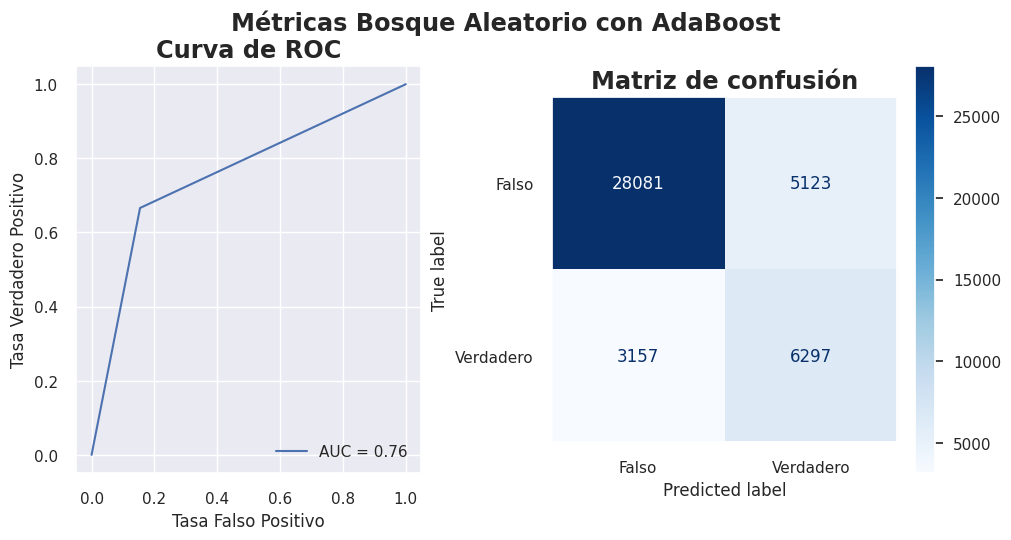

In [ ]:
#@title Medidas Bosque Aleatorio con AdaBoost

encabezado='Reporte de clasificacion'
print(encabezado)
print('-'*len(encabezado))
print(classification_report(y_testT, Y_pred_a))

#Grafico
fig = plt.figure(figsize=(10,5),constrained_layout=True)
fig.suptitle("Métricas Bosque Aleatorio con AdaBoost", y=1.05, fontweight='bold',fontsize='x-large')
ax1 = plt.subplot2grid((1, 2), (0,0))
ax2 = plt.subplot2grid((1, 2), (0,1))

# Curva ROC
fpr, tpr, Adaboost_model = metrics.roc_curve(y_testT, Y_pred_a)

arb_auc = metrics.auc(fpr, tpr)
arb_rocPlot = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=arb_auc)
arb_rocPlot.plot(ax=ax1)
ax1.set_ylabel('Tasa Verdadero Positivo')
ax1.set_xlabel('Tasa Falso Positivo')
ax1.set_title("Curva de ROC", fontweight='bold',fontsize='x-large')

# Matriz de confusion
plt.grid(False)
conf_matrix = confusion_matrix(y_testT, Y_pred_a)
arb_cM = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Falso', 'Verdadero'])
ax2.set_ylabel('Tasa Verdadero Positivo')
ax2.set_xlabel('Tasa Falso Positivo')
arb_cM.plot(cmap='Blues',ax=ax2, values_format='')
ax2.set_title("Matriz de confusión", fontweight='bold',fontsize='x-large')

sns.set(font_scale=1)
plt.show()

#Historial
history_roc.append(roc_auc_score(y_testT, Y_pred_a))
history_f1.append(f1_score(y_testT, Y_pred_a, average='macro'))
#Comentario
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

*  6297 Verdaderos Positivos (TP):El modelo predijo correctamente la clase positiva.

*   5123 Falsos Positivos (FP):El modelo predijo incorrectamente la clase positiva.

*   3157 Falsos Negativos (FN):El modelo predijo incorrectamente la clase negativa.

*   28081 Verdaderos Negativos (TN):El modelo predijo correctamente la clase negativa.

> * **Precisión**: Posee una precisión de 90% y 55% en los valores 0 y 1 respectivamente, lo que indica que estos valores son verdaderos positivos en un 90% y 55%.
* **Recall** (exhaustividad): Indica que un 85%(0) y 67%(1) de las observaciones positivas fueron indicadas correctamente.
* **Accuracy** (Exactitud): Obtuvo un 81%, indicando que el modelo acertó de manera correcta para ambos valores(0,1).
* **F1-score** (promedio armónico de precision y recall): El modelo posee un 87%(0) y 60%(1) de F1-score, lo que indica que su capacidad de capturar valores positivos(recall) y ser exacto con los casos capturados(precision) es buena.
* **AUC** (Área Bajo la Curva): Es de 76% indicando que la capacidad del modelo para distinguir entre clases positivas y negativas es excelente.

# FASE 5: Evaluación del modelo

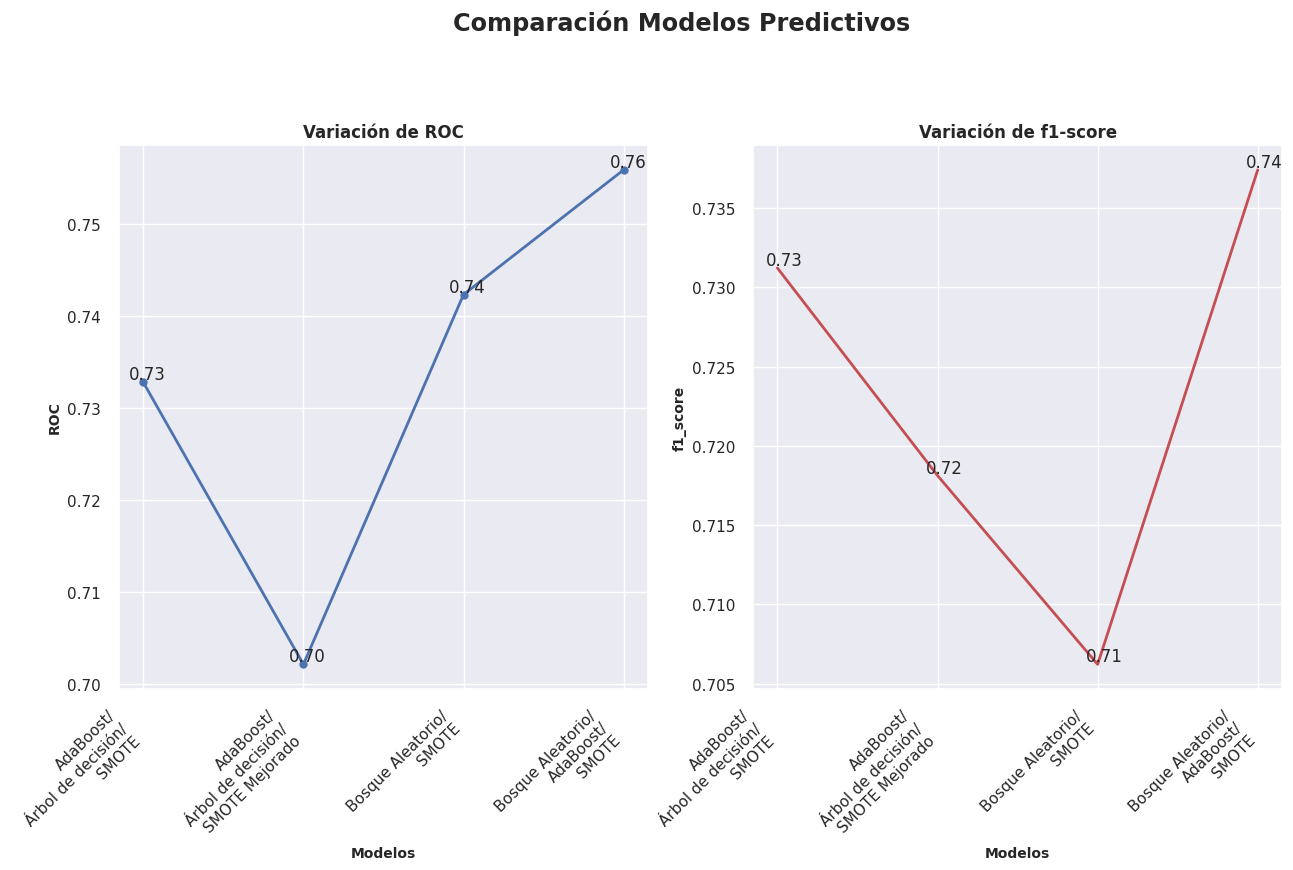

In [ ]:
#@title Comparación Modelos Predictivos

models = ['AdaBoost/\nÁrbol de decisión/\nSMOTE', 'AdaBoost/\nÁrbol de decisión/\nSMOTE Mejorado','Bosque Aleatorio/\nSMOTE','Bosque Aleatorio/\nAdaBoost/\nSMOTE']
fig, axs = plt.subplots(1, 2,figsize=(15,8))
fig.autofmt_xdate(rotation=45)
fig.suptitle("Comparación Modelos Predictivos", y=1.05, fontweight='bold',fontsize='x-large')
axs[0].plot(models, history_roc, 'bo-', linewidth=2)
axs[0].set_xlabel("Modelos", fontsize=10, fontweight="bold")
axs[0].set_ylabel("ROC", fontsize=10, fontweight="bold")
axs[0].set_title("Variación de ROC", fontsize=12, fontweight="bold")
for x,y in zip(models,history_roc):
    label = "{:.2f}".format(y)
    axs[0].annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(3, 2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

axs[1].plot(models, history_f1, 'rx-', linewidth=2)
axs[1].set_xlabel("Modelos", fontsize=10, fontweight="bold")
axs[1].set_ylabel("f1_score", fontsize=10, fontweight="bold")
axs[1].set_title("Variación de f1-score", fontsize=12, fontweight="bold")
for x,y in zip(models,history_f1):
    label = "{:.2f}".format(y)
    axs[1].annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(5, 2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.show()

In [ ]:
#@title Tabla comparativa

f1 = f1_score(Ytestmediana, prediction_ada, average='macro')
f2 = f1_score(y_test, Y_pred_aT,  average='macro')
f3 = f1_score(y_test_T, Y_pred_r, average='macro')
f4 = f1_score(y_testT, Y_pred_a, average='macro')

r1 = recall_score(Ytestmediana, prediction_ada , average='macro')
r2 = recall_score(y_test, Y_pred_aT, average='macro')
r3 = recall_score(y_test_T, Y_pred_r, average='macro')
r4 = recall_score(y_testT, Y_pred_a, average='macro')

p1 = precision_score(Ytestmediana, prediction_ada, average='macro')
p2 = precision_score(y_test, Y_pred_aT, average='macro')
p3 = precision_score(y_test_T, Y_pred_r, average='macro')
p4 = precision_score(y_testT, Y_pred_a, average='macro')

a1 = accuracy_score(Ytestmediana, prediction_ada)
a2 = accuracy_score(y_test, Y_pred_aT)
a3 = accuracy_score(y_test_T, Y_pred_r )
a4 = accuracy_score(y_testT, Y_pred_a)

tabla = pd.DataFrame({'Modelo': ["ArboldedecisionMejorado/SMOTE","Arboldecision/SMOTE","BosqueAleatorio/SMOTE","BosqueAleatorioMejorado/SMOTE"],
              'Accuracy':    [float(f'{(a1):.2f}'),float(f'{(a2):.2f}'),float(f'{(a3):.2f}'),float(f'{(a4):.2f}')],
              'Precision':    [float(f'{(p1):.2f}'),float(f'{(p2):.2f}'),float(f'{(p3):.2f}'),float(f'{(p4):.2f}')],
              'Recall': [float(f'{(r1):.2f}'),float(f'{(r2):.2f}'),float(f'{(r3):.2f}'),float(f'{(r4):.2f}')],
              'F1_score':    [float(f'{(f1):.2f}'),float(f'{(f2):.2f}'),float(f'{(f3):.2f}'),float(f'{(f4):.2f}')]

              })

print(tabla)
#Comentario
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))

                          Modelo  Accuracy  Precision  Recall  F1_score
0  ArboldedecisionMejorado/SMOTE      0.82       0.74    0.70      0.72
1            Arboldecision/SMOTE      0.81       0.73    0.73      0.73
2          BosqueAleatorio/SMOTE      0.77       0.69    0.74      0.71
3  BosqueAleatorioMejorado/SMOTE      0.81       0.73    0.76      0.74


La **Accuracy** indica el porcentaje  de elementos clasificados correctamente en comparación con el total.

El **F1-score** resume la **precisión** y **recall** en una sola métrica equilibrada, teniendo en cuenta tanto los falsos positivos como los falsos negativos.

La **Precision** nos da la calidad de la predicción, el pocentaje de lo que el modelo ha marcado como positivo y negativo con respecto a lo que en realidad lo son.

La **Recall** nos indica la proporción de casos positivos que fueron correctamente identificadas por el algoritmo.


---

>* **ROC** : Los modelos presentan un valor de AUC de AdaBoost/Smote=73%, AdaBoost/Smote/GridSearch=70% y Bosque Aleatorio=74% y Bosque Aleatorio/AdaBoost=76% siendo Bosque Aleatorio/AdaBoost el modelo con mayor porcentaje, indicando que su capacidad de distinguir entre clases positivas y negativas es media.
* **F1-score** : Los modelos presentan un valor de Recall de  AdaBoost/Smote=73%, AdaBoost/Smote/GridSearch=72%,  Bosque Aleatorio/Smote=71% y Bosque Aleatorio/AdaBoost/Smote=74%, siendo este último el puntaje mayor, indicando que la capacidad del modelo para distinguir entre clases positivas y negativas es medio.

>Finalmente, debido a las medidas presentadas por los modelos utilizados, escogimos el Modelo 2, Bosque Aleatorio/AdaBoost/Smote para realizar la predicción. Esto es, debido a que tanto AUC como F1-score son buenas métricas para medir el rendimiento de los modelos cuando existe desiquilibrio de la columna objetivo. Específicamente, observamos el promedio macro de f1-score, ya que el promedio entregado es calculado de manera independiente para ambas clases, dando igual importancia a ambas métricas. En el caso de AUC, nos da una idea general de la capacidad del modelo para distinguir entre clases.


# FASE 6: Despliegue


In [ ]:
#@title Predicción Modelo  Bosque Aleatorio con AdaBoost

x_WindGustSpeed = 46.0; x_Cloud3pm = 5; x_Cloud9am=8; x_Humidity9am=13.37; x_Humidity3pm=5.38; x_Rainfall=203;
input = np.array([x_WindGustSpeed, x_Cloud3pm,x_Cloud9am,x_Humidity9am,x_Humidity3pm,x_Rainfall]).reshape(1,-1)
prediction = Adaboost_aleatorio.predict(pd.DataFrame(input,columns=X_train_bosque.columns))
if 1 in prediction:
  prediction="Sí lloverá al día siguiente"
else:
  prediction="No lloverá al día siguiente"
#Comentario
display(HTML('<hr><h3 style="background: linear-gradient(90deg, rgba(64,50,79,1) 6%, \
rgba(153,155,191,1) 75%, rgba(63,172,116,0.6073616946778712) 100%)">Observación:</h3>'))
print("Considerando los siguientes parámetros: \n \
      * Velocidad de la ráfaga de viento más fuerte en 24 horas: {0}km/hr. \n \
      * Porción del cielo cubierto por nubes a las 3pm en (0=despejado a 8=nublado): {1} octavos.\n \
      * Porción del cielo cubierto por nubes a las 9am en (0=despejado a 8=nublado): {2} octavos.\n \
      * Humedad a las 3pm de: {3}%. \n \
      * Humedad a las 9am de: {4}%. \n \
      * Cantidad de lluvia caída en el día anterior: {5} mm.\n \
Indica que: {6}".format(x_WindGustSpeed, x_Cloud3pm,x_Cloud9am,x_Humidity9am,x_Humidity3pm,x_Rainfall , prediction), end=".")

Considerando los siguientes parámetros: 
       * Velocidad de la ráfaga de viento más fuerte en 24 horas: 46.0km/hr. 
       * Porción del cielo cubierto por nubes a las 3pm en (0=despejado a 8=nublado): 5 octavos.
       * Porción del cielo cubierto por nubes a las 9am en (0=despejado a 8=nublado): 8 octavos.
       * Humedad a las 3pm de: 13.37%. 
       * Humedad a las 9am de: 5.38%. 
       * Cantidad de lluvia caída en el día anterior: 203 mm.
 Indica que: Sí lloverá al día siguiente.